# Tanzanian Water Wells: A Data-Driven Solution

## BUSINESS UNDERSTANDING

## 1. The Problem

Tanzania, a nation of over **70 million people**, faces a significant challenge, which is: "providing **reliable access to clean, safe drinking water**."

Although **thousands of water points** have been constructed, a large proportion are **broken** or **in disrepair** due to:
- Lack of routine **maintenance**
- **Limited funding**
- Pressure from **population growth**
- Increasing impact of **climate change**

This situation threatens public health and economic development.

---

## 2. Our Solution

We propose a **smart predictive tool** that uses machine learning to classify the condition of water wells as:
- ✅ **Functional**
- ⚠️ **Functional but needs repair**
- ❌ **Non-functional**

This tool will allow stakeholders to **prioritize interventions**, optimize repairs, and plan for **sustainable development**.

---

## 3. Key Partners & Stakeholders

| Stakeholder                                   | Role & Value Contribution |
|-----------------------------------------------|----------------------------|
| **Government of Tanzania** <br> *Ministry of Water* | Utilize insights for better **design and construction** of sustainable wells |
| **NGOs** <br> *WaterAid, Water.org*           | Use predictive insights to **prioritize repairs** and improve operational efficiency |

---

## 4. The Value We Create

By leveraging **historical and real-time data**, our model enables:

- 💰 **Smarter Resource Allocation**  
  Prioritize repair efforts to focus on high-need areas, maximizing impact.

- 🧠 **Proactive Planning**  
  Identify patterns of failure to guide **durable infrastructure** planning.

- 🌍 **Improved Quality of Life**  
  Ensure **clean water access**, reduce waterborne disease, and support healthier communities.

---

## 5. Our Data & Resources

To power our predictive model, we will use a comprehensive dataset of over **59,000 water points** across Tanzania. This dataset contains information collected at the community level about the characteristics, usage, and condition of each water point.

### 🔑 Key Features and What They Mean

| Feature Name            | Description                                                                 | Relevance to Model                                                 |
|-------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------|
| `id`                    | Unique identifier for each water point                                      | Enables data merging and traceability                              |
| `amount_tsh`            | Tariff or contribution required to use the water point (in Tanzanian Shillings) | May reflect sustainability or accessibility of the service         |
| `date_recorded`         | Date when the information was collected                                     | Useful for identifying aging data or seasonal patterns              |
| `funder`                | Entity that financed the water project                                      | Potential influence on project quality                             |
| `gps_height`            | Elevation above sea level (in meters)                                       | Can affect groundwater availability                                |
| `installer`             | Who installed the water point                                               | Impacts long-term functionality based on contractor performance     |
| `longitude` / `latitude`| Geographic coordinates                                                      | Critical for geospatial modeling and visualizations                 |
| `basin`                 | Hydrological drainage area                                                  | Links water availability to natural geography                      |
| `region`, `district_code`, `lga`, `ward` | Administrative boundaries                                | Useful for regional prioritization and trend analysis              |
| `subvillage`            | Community-level name                                                        | May be used for grouping or contextual insights                    |
| `population`            | Number of people served                                                     | Higher usage may cause more frequent breakdowns                    |
| `public_meeting`        | Whether a community meeting was held about the water point                  | Indicates level of community engagement                            |
| `scheme_management`     | Management structure (e.g., community-based, utility)                       | Strong influence on maintenance patterns                           |
| `permit`                | Whether the water point is legally permitted                                | May correlate with reliability or compliance                       |
| `construction_year`     | Year the water point was built                                              | Key indicator of infrastructure age and wear                       |
| `extraction_type_class` | General type of pump system used (e.g., handpump, motor)                    | Affects functionality and maintenance needs                        |
| `management_group`      | Simplified version of the managing entity                                   | Helps reduce complexity for the model                              |
| `payment_type`          | General payment method (e.g., monthly, per bucket)                          | Indicates cost-sharing model and likelihood of upkeep              |
| `water_quality`         | Observed or tested quality of water                                         | Tied directly to usability and health outcomes                     |
| `quantity_group`        | Grouped indication of water quantity (e.g., dry, sufficient)                | Crucial for understanding performance and need                     |
| `source_class`          | Class of water source (surface vs. groundwater)                             | Impacts reliability and seasonal variability                       |
| `waterpoint_type_group` | High-level structure type of the water point (e.g., standpipe, well)        | Important for understanding typical failure patterns               |

### 🧠 Features Recommended for Modeling

Based on domain relevance and completeness, the following features are prioritized for our predictive model:

- **Technical & Structural**: `construction_year`, `extraction_type_class`, `waterpoint_type_group`
- **Management & Finance**: `management_group`, `payment_type`, `scheme_management`
- **Environmental & Geospatial**: `gps_height`, `longitude`, `latitude`, `source_class`, `basin`, `region`
- **Community & Engagement**: `population`, `public_meeting`, `permit`
- **Service Quality**: `water_quality`, `quantity_group`

These features will help the model accurately predict whether a water point is:
- ✅ **Functional**
- ⚠️ **Functional but needs repair**
- ❌ **Non-functional**


## 6. Next Steps

To deliver a robust and actionable solution, our project will proceed through the following structured phases:

1. **Data Understanding**  
   - Conduct descriptive statistics on key variables (e.g., age, region, population)  
   - Explore feature distributions and correlations with well status  
   - Visualize spatial trends using GPS coordinates and administrative boundaries  
   - Identify imbalanced classes and assess data quality

2. **Data Cleaning**  
   - Handle missing values, outliers, and inconsistencies  
   - Standardize formats and engineer preliminary features  
   - Prepare geospatial data (latitude/longitude) for mapping


3. **Exploratory Data Analysis (EDA)**  
   - Generate visual summaries (e.g., bar charts, heatmaps, geoplots)  
   - Segment patterns by region, management, and technology type  
   - Detect outliers and anomalies that may require engineering fixes

5. **Hypothesis Testing**

4. **Model Development**  
   - Train classification models to predict water point status  
   - Compare model performance (accuracy, recall, F1-score)  
   - Tune hyperparameters and evaluate on validation data

In [213]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
import warnings

# Temporarily suppress all warnings
warnings.filterwarnings('ignore')

### DATA UNDERSTANDING

In [214]:
#Loading the datasets

df_train_values = pd.read_csv('../data/train-set-values.csv')
df_train_labels = pd.read_csv('../data/train-set-labels.csv')
df_test_values = pd.read_csv('../data/test-set-values.csv')

In [215]:
#first few rows of the training values dataset
df_train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [216]:
#first few rows of the training labels dataset
df_train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [217]:
#first few rows of the test values dataset
df_test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [218]:
#Merge the training features and labels into a single dataframe
df_train = pd.merge(df_train_values, df_train_labels, on='id')

In [219]:
#Displaying basic information about the training dataset
print("Training Data Info:")
print(df_train.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-n

In [220]:
#changing date_recorded to datetime format
df_train["date_recorded"] = pd.to_datetime(df_train["date_recorded"], errors='coerce')

In [221]:
#Display first few rows of the training dataset
print("\nTraining Data Sample:")
df_train.head()


Training Data Sample:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [222]:
#Check for missing values
print("\nMissing Values in Training Data:")
print(df_train.isnull().sum().sort_values(ascending=False))


Missing Values in Training Data:
scheme_name              28810
scheme_management         3878
installer                 3655
funder                    3637
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
water_quality                0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
quantity                     0
quality_group                0
extraction_type              0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
extraction_type_group        0
id                           0
construction_year            0
amount_tsh                   0
recorded_by                  0
population                   0
ward                         0
lga                          0
distr

In [223]:
#Check categorical columns
categorical_cols = df_train.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols.tolist())


Categorical Columns: ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


In [224]:
#Check numerical columns
numerical_cols = df_train.select_dtypes(include=['number'])
print("\nNumerical Columns:")
numerical_cols.head()


Numerical Columns:


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0


In [225]:
#Statistical summary of categorical features
df_train.describe(include=['O'])

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,55763,55745,59398,59400,59029,59400,59400,59400,56066,59400,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,1896,2145,37399,9,19287,21,125,2092,2,1,...,8,6,5,5,10,7,3,7,6,3
top,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,9084,17402,3563,10248,508,5294,2503,307,51011,59400,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [226]:
#Statistical summary of the training dataset(numerical features)
df_train.describe()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,2012-03-29 09:11:33.818181888,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
min,0.000000,0.000000,2002-10-14 00:00:00,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,2011-04-01 00:00:00,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,2012-10-10 00:00:00,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,2013-02-09 00:00:00,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2013-12-03 00:00:00,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000
std,21453.128371,2997.574558,NaN,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547


In [227]:
#Looking at the correlation of the numerical features
numerical_cols.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


The correlation between district_code and region_code is high, which makes sense because districts are located within regions.

A slight correlation exists between population and construction_year, but this relationship is likely skewed by the general growth in population over time.

The strongest correlation is found between construction_year and gps_height. This suggests that newer wells are being built at higher elevations, possibly due to advances in technology. This observation leads us to investigate other technological variables, such as extraction_type, to see if they are also related to a well's age and location.

In [228]:
#Value counts for categorical features
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df_train[col].value_counts())
    print("\n")
    


Value Counts for funder:
funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Muwasa                       1
Msigw                        1
Rc Mofu                      1
Overland High School         1
Samlo                        1
Name: count, Length: 1896, dtype: int64



Value Counts for installer:
installer
DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: count, Length: 2145, dtype: int64



Value Counts for wpt_name:
wpt_name
none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 

In [229]:
#value counts for numerical features
for col in numerical_cols:
    print(f"\nValue Counts for {col}:")
    print(df_train[col].value_counts())
    print("\n")


Value Counts for id:
id
69572    1
27851    1
6924     1
61097    1
48517    1
        ..
59036    1
56446    1
3855     1
52786    1
26348    1
Name: count, Length: 59400, dtype: int64



Value Counts for amount_tsh:
amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64



Value Counts for gps_height:
gps_height
 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: count, Length: 2428, dtype: int64



Value Counts for longitude:
longitude
0.000000     1812
37.375717       2
38.340501       2
39.086183       2
33.005032       2
             ... 
35.885754       1
36.626541       1
37.333530       1
38.970078       1
38.104048       1
Name: count, Length: 57516, dtype: int64



Val

### Key Observations made:
1. The columns ("quantity and quantity_group","payment and payment_type) are identical.To avoid redudancy one will be dropped
2. One-third of the data has a construction year of 0, which represents missing information. 
3. The columns ("waterpoint_type" and waterpoint_type_group") are almost similar though waterpoint_type has more unique values therefore will drop the other one

In [230]:
#Check unique values for each column
for col in df_train.columns:
    unique_values = df_train[col].nunique()
    print(f"Column '{col}' has {unique_values} unique values.")
    

Column 'id' has 59400 unique values.
Column 'amount_tsh' has 98 unique values.
Column 'date_recorded' has 356 unique values.
Column 'funder' has 1896 unique values.
Column 'gps_height' has 2428 unique values.
Column 'installer' has 2145 unique values.
Column 'longitude' has 57516 unique values.
Column 'latitude' has 57517 unique values.
Column 'wpt_name' has 37399 unique values.
Column 'num_private' has 65 unique values.
Column 'basin' has 9 unique values.
Column 'subvillage' has 19287 unique values.
Column 'region' has 21 unique values.
Column 'region_code' has 27 unique values.
Column 'district_code' has 20 unique values.
Column 'lga' has 125 unique values.
Column 'ward' has 2092 unique values.
Column 'population' has 1049 unique values.
Column 'public_meeting' has 2 unique values.
Column 'recorded_by' has 1 unique values.
Column 'scheme_management' has 11 unique values.
Column 'scheme_name' has 2695 unique values.
Column 'permit' has 2 unique values.
Column 'construction_year' has 5

In [231]:
#Check for duplicate rows
duplicate_rows = df_train.duplicated().sum()
print(f"\nNumber of duplicate rows in training data: {duplicate_rows}")


Number of duplicate rows in training data: 0


### DATA CLEANING AND PREPARATION

In [232]:
#creating a copy of the original dataframe
df = df_train.copy()

In [233]:
#Dropping irrelevant columns
df.drop(columns=['date_recorded','wpt_name', 'subvillage', 'lga', 
 'ward', 'recorded_by', 'scheme_name', 'extraction_type', 
 'extraction_type_class', 'management', 'payment', 'quality_group', 
 'quantity', 'source', 'source_type', 'num_private', 
 'region_code', 'district_code', 'waterpoint_type','population'], inplace=True)

In [234]:
# Display the modified
df

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,public_meeting,...,permit,construction_year,extraction_type_group,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,True,...,False,1999,gravity,user-group,annually,soft,enough,groundwater,communal standpipe,functional
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,NaN,...,True,2010,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe,functional
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,True,...,True,2009,gravity,user-group,per bucket,soft,enough,surface,communal standpipe,functional
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,True,...,True,1986,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe,non functional
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,True,...,True,0,gravity,other,never pay,soft,seasonal,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,True,...,True,1999,gravity,user-group,per bucket,soft,enough,groundwater,communal standpipe,functional
59396,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,True,...,True,1996,gravity,user-group,annually,soft,enough,surface,communal standpipe,functional
59397,37057,0.0,NaN,0,NaN,34.017087,-8.750434,Rufiji,Mbeya,True,...,False,0,swn 80,user-group,monthly,fluoride,enough,groundwater,hand pump,functional
59398,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,True,...,True,0,nira/tanira,user-group,never pay,soft,insufficient,groundwater,hand pump,functional


In [235]:
#check for null values again
df.isnull().sum().sort_values(ascending=False)

scheme_management        3878
installer                3655
funder                   3637
public_meeting           3334
permit                   3056
extraction_type_group       0
waterpoint_type_group       0
source_class                0
quantity_group              0
water_quality               0
payment_type                0
management_group            0
id                          0
construction_year           0
amount_tsh                  0
region                      0
basin                       0
latitude                    0
longitude                   0
gps_height                  0
status_group                0
dtype: int64

In [236]:
#dropping rows with null values
df.dropna(inplace=True)

In [237]:
#confirming that there are no null values
df.isnull().sum().sort_values(ascending=False)

id                       0
permit                   0
waterpoint_type_group    0
source_class             0
quantity_group           0
water_quality            0
payment_type             0
management_group         0
extraction_type_group    0
construction_year        0
scheme_management        0
amount_tsh               0
public_meeting           0
region                   0
basin                    0
latitude                 0
longitude                0
installer                0
gps_height               0
funder                   0
status_group             0
dtype: int64

In [238]:
# Replacing 0s in construction_year with NaN
df["construction_year"] = df["construction_year"].replace(0, np.nan)
df["construction_year"].isnull().sum()

16176

In [239]:
# filling null values in construction_year with "Unknown"
df["construction_year"] = df["construction_year"].fillna(df["construction_year"]=="Unknown")

In [240]:
# renaming construction_year to decade
df['decade'] = df['construction_year']

In [241]:
# categorizing construction_year into decades
df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [242]:
#installer value counts
df['installer'].value_counts()

installer
DWE            14670
Government      1438
Commu           1059
RWE             1032
KKKT             885
               ...  
Centra govt        1
HESAWZ             1
CONCE              1
B.A.P              1
SELEPTA            1
Name: count, Length: 1799, dtype: int64

In [243]:
# Fixing inconsistent entries in the 'installer' column

df['installer'] = df['installer'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT', 'TANZANIAN GOVERNMENT', 'Central govt', 
                                          'Centr', 'Centra govt', 'Tanzanian Government', 'Tanzania', 
                                          'Tanz', 'Tanza', 'GOVERNMENT', 
                                          'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove', 
                                          'Governme', 'Governmen', 'Got', 'Serikali', 'Serikari', 'Government',
                                          'Central Government'), 
                                          value = 'Central Government')

df['installer'] = df['installer'].replace(to_replace = ('IDARA', 'Idara ya maji', 'MINISTRY OF WATER',
                                          'Ministry of water', 'Ministry of water engineer', 'MINISTRYOF WATER', 
                                          'MWE &', 'MWE', 'Wizara ya maji', 'WIZARA', 'wizara ya maji',
                                          'Ministry of Water'), 
                                          value ='Ministry of Water')

df['installer'] = df['installer'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'Halmashauri ya wilaya',
                                          'Halmashauri wilaya', 'District Council'), 
                                          value = 'District  Council')

df['installer'] = df['installer'].replace(to_replace = ('District water depar', 'District Water Department', 
                                          'District water department', 'Distric Water Department'),
                                          value = 'District Water Department')

df['installer'] = df['installer'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Villege Council', 'Villagerd', 
                                          'Villager', 'VILLAGER', 'Villagers',  'Villagerd', 'Village Technician', 
                                          'Village water attendant', 'Village Office', 'VILLAGE COUNCIL',
                                          'VILLAGE COUNCIL .ODA', 'VILLAGE COUNCIL Orpha', 'Village community members', 
                                          'VILLAG', 'VILLAGE', 'Village Government', 'Village government', 
                                          'Village Govt', 'Village govt', 'VILLAGERS', 'VILLAGE WATER COMMISSION',
                                          'Village water committee', 'Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                           'Comunity', 'Communit', 'Kijiji', 'Serikali ya kijiji', 'Community'), 
                                          value ='Community')

df['installer'] = df['installer'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER', 
                                          'FinWate', 'FINLAND', 'Fin Water', 'Finland Government'), 
                                          value ='Finnish Government')

df['installer'] = df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Roman Church', 'Roman Catholic',
                                          'Roman catholic', 'Roman Ca', 'Roman', 'Romam', 'Roma', 
                                          'ROMAN CATHOLIC', 'Kanisa', 'Kanisa katoliki'), 
                                          value ='Roman Catholic Church')

df['installer'] = df['installer'].replace(to_replace = ('Dmdd', 'DMDD'), value ='DMDD') 

df['installer'] = df['installer'].replace(to_replace = ('TASA', 'Tasaf', 'TASAF 1', 'TASAF/', 'TASF',
                                          'TASSAF', 'TASAF'), value ='TASAF') 

df['installer'] = df['installer'].replace(to_replace = ('RW', 'RWE'), value ='RWE')

df['installer'] = df['installer'].replace(to_replace = ('SEMA CO LTD', 'SEMA Consultant', 'SEMA'), value ='SEMA')

df['installer'] = df['installer'].replace(to_replace = ('DW E', 'DW#', 'DW$', 'DWE&', 'DWE/', 'DWE}', 
                                         'DWEB', 'DWE'), value ='DWE')

df['installer'] = df['installer'].replace(to_replace = ('No', 'NORA', 'Norad', 'NORAD/', 'NORAD'), 
                                          value ='NORAD') 

df['installer'] = df['installer'].replace(to_replace = ('Ox', 'OXFARM', 'OXFAM'), value ='OXFAM') 

df['installer'] = df['installer'].replace(to_replace = ('PRIV', 'Priva', 'Privat', 'private', 'Private company',
                                          'Private individuals', 'PRIVATE INSTITUTIONS', 'Private owned',
                                          'Private person', 'Private Technician', 'Private'), 
                                          value ='Private') 

df['installer'] = df['installer'].replace(to_replace = ('Ch', 'CH', 'Chiko', 'CHINA', 'China',
                                            'China Goverment'), value ='Chinese Goverment')

df['installer'] = df['installer'].replace(to_replace = ('Unisef','Unicef', 'UNICEF'), value ='UNICEF')
                                          
df['installer'] = df['installer'].replace(to_replace = ('Wedeco','WEDEKO', 'WEDECO'), value ='WEDECO')

df['installer'] = df['installer'].replace(to_replace = ('Wo','WB', 'Word Bank', 'Word bank', 'WBK',
                                          'WORDL BANK', 'World', 'world', 'WORLD BANK', 'World bank',
                                          'world banks', 'World banks', 'WOULD BANK', 'World Bank'), 
                                          value ='World Bank')
                                          
df['installer'] = df['installer'].replace(to_replace = ('Lga', 'LGA'), value ='LGA')

df['installer'] = df['installer'].replace(to_replace = ('World Division', 'World Visiin', 
                                         'World vision', 'WORLD VISION', 'world vision', 'World Vission', 
                                          'World Vision'), 
                                          value ='World Vision')

df['installer'] = df['installer'].replace(to_replace = ('Local', 'Local technician', 'Local  technician',
                                         'local  technician', 'LOCAL CONTRACT', 'local fundi', 
                                         'Local l technician', 'Local te', 'Local technical', 'Local technical tec',
                                         'local technical tec', 'local technician', 'Local technitian',
                                         'local technitian', 'Locall technician', 'Localtechnician',
                                         'Local Contractor'), 
                                          value ='Local Contractor')
                                          
df['installer'] = df['installer'].replace(to_replace = ('DANID', 'DANNY', 'DANNIDA', 'DANIDS', 
                                         'DANIDA CO', 'DANID', 'Danid', 'DANIAD', 'Danda', 'DA',
                                         'DENISH', 'DANIDA'), 
                                          value ='DANIDA')

df['installer'] = df['installer'].replace(to_replace =('Adrs', 'Adra', 'ADRA'), value ='ADRA')
                                          
df['installer'] = df['installer'].replace(to_replace = ('Hesawa', 'hesawa', 'HESAW', 'hesaw',
                                          'HESAWQ', 'HESAWS', 'HESAWZ', 'hesawz', 'hesewa', 'HSW',
                                          'HESAWA'),
                                          value ='HESAWA')

df['installer'] = df['installer'].replace(to_replace = ('Jaica', 'JAICA', 'Jica', 'Jeica', 'JAICA CO', 'JALCA',
                                          'Japan', 'JAPAN', 'JAPAN EMBASSY', 'Japan Government', 'Jicks',
                                          'JIKA', 'jika', 'jiks', 'Embasy of Japan in Tanzania', 'JICA'), 
                                          value ='JICA')

df['installer'] = df['installer'].replace(to_replace = ('KKT', 'KK', 'KKKT Church', 'KkKT', 'KKT C',
                                          'KKKT'), value ='KKKT')

df['installer'] = df['installer'].replace(to_replace = ('0', 'Not Known', 'not known', 'Not kno'), value ='Unknown')

In [244]:
# Get a list of the top 20 installers
top_20_installers = df['installer'].value_counts().head(20).index

# Use a lambda function with .apply() to change the values
df['installer'] = df['installer'].apply(lambda x: x if x in top_20_installers else "OTHER")

In [245]:
df["installer"].value_counts()

installer
OTHER                    16894
DWE                      14694
Central Government        3362
Community                 2137
DANIDA                    1577
District  Council         1160
RWE                       1046
HESAWA                     961
KKKT                       935
Finnish Government         696
TCRS                       668
CES                        610
World Vision               589
Ministry of Water          488
Roman Catholic Church      467
TASAF                      427
LGA                        405
NORAD                      395
JICA                       387
WEDECO                     382
Unknown                    370
Name: count, dtype: int64

In [246]:
df['funder'] = df['funder'].astype(str).str.lower().str.strip()

# Replace common placeholders for missing values with NaN
missing_funders = ["0", "none", "nan", "na", ""]
df['funder'] = df['funder'].replace(missing_funders, np.nan)

# Standardize known funder names
funder_mappings = {
    "govt of tanzania": "government of tanzania",
    "tanzania government": "government of tanzania",
    "germany republi": "german republic",
    "gvt": "government of tanzania",
    "world vision": "world vision",
    "vision world": "world vision",
    "roman catholic": "church",
    "catholic church": "church"
}

df['funder'] = df['funder'].replace(funder_mappings)

# Retain only the top N funders, group others into "other"
top_n = 20
top_funders = df['funder'].value_counts().nlargest(top_n).index
df['funder_clean'] = df['funder'].where(df['funder'].isin(top_funders), "other")

# Check the cleaned funder value counts
print(df['funder_clean'].value_counts())

funder_clean
other                     23585
government of tanzania     8147
danida                     2920
hesawa                     1389
kkkt                       1261
world bank                 1190
world vision               1044
unicef                     1005
rwssp                       802
district council            801
tasaf                       787
private individual          767
norad                       759
german republic             610
water                       583
dwsp                        545
tcrs                        544
ministry of water           526
dwe                         472
netherlands                 457
dhv                         456
Name: count, dtype: int64


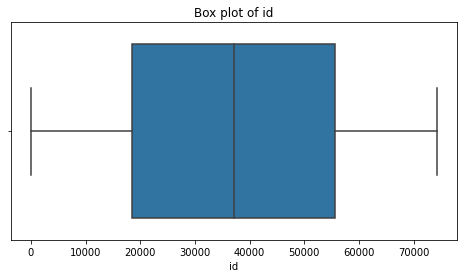

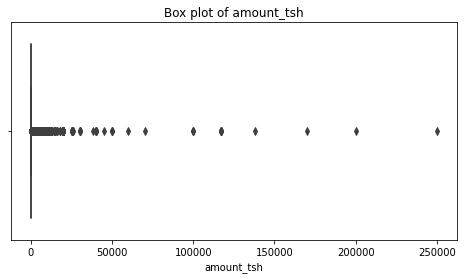

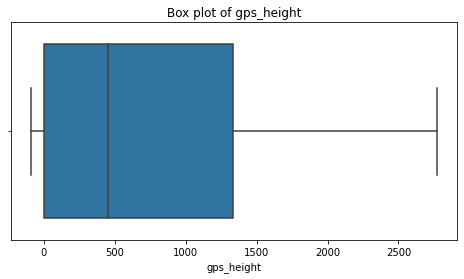

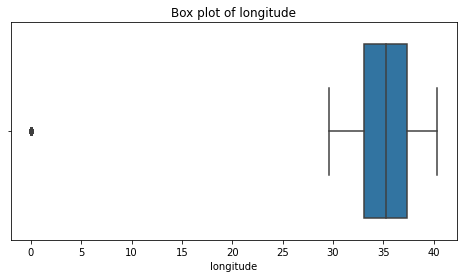

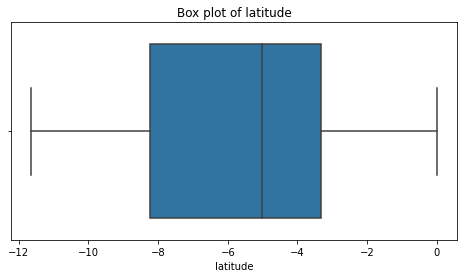

In [247]:
#Checking for outliers in numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()
    

There are no outliers in amount since the high number of zero values are making non-zero values appear as outliers.

Since the rows with a longitude of 0 constitute only about 4% of the dataset, they will be removed to address the issue of inaccurate location data.

In [248]:
#dropping rows in longitude is 0
df = df[df['longitude'] != 0]

In [249]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_group',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_class', 'waterpoint_type_group', 'status_group', 'decade',
       'funder_clean'],
      dtype='object')

In [250]:
# Converting 'public_meeting' and 'permit' to integer type
#df[['public_meeting', 'permit']] = df[['public_meeting', 'permit']].astype(int)

#### Cleaning the df_test_values

In [251]:
#creating a copy of the test values dataframe
df_test = df_test_values.copy()

In [252]:
df_test_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [253]:
#Dropping irrelevant columns
df_test.drop(columns=['date_recorded','wpt_name', 'subvillage', 'lga', 
 'ward', 'recorded_by', 'scheme_name', 'extraction_type', 
 'extraction_type_class', 'management', 'payment', 'quality_group', 
 'quantity', 'source', 'source_type', 'num_private', 
 'region_code', 'district_code', 'waterpoint_type','population'], inplace=True)

In [254]:
#checking for null values 
df_test.isna().sum().sort_values(ascending=False)

scheme_management        969
installer                877
funder                   870
public_meeting           821
permit                   737
construction_year          0
source_class               0
quantity_group             0
water_quality              0
payment_type               0
management_group           0
extraction_type_group      0
id                         0
amount_tsh                 0
region                     0
basin                      0
latitude                   0
longitude                  0
gps_height                 0
waterpoint_type_group      0
dtype: int64

In [255]:
#dropping rows with null values
df_test.dropna(inplace=True)

In [256]:
df_test

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,public_meeting,scheme_management,permit,construction_year,extraction_type_group,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group
0,50785,0.0,Dmdd,1996,DMDD,35.290799,-4.059696,Internal,Manyara,True,Parastatal,True,2012,other,parastatal,never pay,soft,seasonal,surface,other
1,51630,0.0,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Pangani,Arusha,True,VWC,True,2000,gravity,user-group,never pay,soft,insufficient,groundwater,communal standpipe
5,52449,0.0,Government Of Tanzania,1685,DWE,36.685279,-3.302420,Pangani,Arusha,True,VWC,True,1990,gravity,user-group,never pay,soft,enough,groundwater,communal standpipe
6,24806,0.0,Government Of Tanzania,550,Gover,36.398041,-7.541382,Rufiji,Iringa,True,VWC,True,2007,india mark ii,user-group,never pay,salty,enough,groundwater,hand pump
7,28965,0.0,Finw,234,FinW,39.607420,-10.893786,Ruvuma / Southern Coast,Mtwara,True,Water Board,True,1982,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14844,68174,0.0,Netherlands,0,DWE,34.096878,-3.079689,Lake Victoria,Shinyanga,True,WUG,False,0,nira/tanira,user-group,other,soft,enough,groundwater,hand pump
14845,39307,0.0,Danida,34,Da,38.852669,-6.582841,Wami / Ruvu,Pwani,True,VWC,True,1988,mono,user-group,never pay,soft,enough,surface,communal standpipe
14846,18990,1000.0,Hiap,0,HIAP,37.451633,-5.350428,Pangani,Tanga,True,VWC,False,1994,nira/tanira,user-group,annually,salty,insufficient,groundwater,hand pump
14848,33492,0.0,Germany,998,DWE,35.432732,-10.584159,Lake Nyasa,Ruvuma,True,VWC,True,2009,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe


In [257]:
df_test.installer.value_counts().sort_values(ascending=False)

installer
DWE                            3646
Government                      373
Commu                           287
RWE                             246
KKKT                            221
                               ... 
NDDP                              1
District Counci                   1
UMOJA DRILLING CONSTRUCTION       1
SINGIDA TETU                      1
LIVI                              1
Name: count, Length: 946, dtype: int64

In [258]:
# Fixing inconsistent entries in the 'installer' column

df_test['installer'] = df_test['installer'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT', 'TANZANIAN GOVERNMENT', 'Central govt', 
                                          'Centr', 'Centra govt', 'Tanzanian Government', 'Tanzania', 
                                          'Tanz', 'Tanza', 'GOVERNMENT', 
                                          'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove', 
                                          'Governme', 'Governmen', 'Got', 'Serikali', 'Serikari', 'Government',
                                          'Central Government'), 
                                          value = 'Central Government')

df_test['installer'] = df_test['installer'].replace(to_replace = ('IDARA', 'Idara ya maji', 'MINISTRY OF WATER',
                                          'Ministry of water', 'Ministry of water engineer', 'MINISTRYOF WATER', 
                                          'MWE &', 'MWE', 'Wizara ya maji', 'WIZARA', 'wizara ya maji',
                                          'Ministry of Water'), 
                                          value ='Ministry of Water')

df_test['installer'] = df_test['installer'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'Halmashauri ya wilaya',
                                          'Halmashauri wilaya', 'District Council'), 
                                          value = 'District  Council')

df_test['installer'] = df_test['installer'].replace(to_replace = ('District water depar', 'District Water Department', 
                                          'District water department', 'Distric Water Department'),
                                          value = 'District Water Department')

df_test['installer'] = df_test['installer'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Villege Council', 'Villagerd', 
                                          'Villager', 'VILLAGER', 'Villagers',  'Villagerd', 'Village Technician', 
                                          'Village water attendant', 'Village Office', 'VILLAGE COUNCIL',
                                          'VILLAGE COUNCIL .ODA', 'VILLAGE COUNCIL Orpha', 'Village community members', 
                                          'VILLAG', 'VILLAGE', 'Village Government', 'Village government', 
                                          'Village Govt', 'Village govt', 'VILLAGERS', 'VILLAGE WATER COMMISSION',
                                          'Village water committee', 'Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                           'Comunity', 'Communit', 'Kijiji', 'Serikali ya kijiji', 'Community'), 
                                          value ='Community')

df_test['installer'] = df_test['installer'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER', 
                                          'FinWate', 'FINLAND', 'Fin Water', 'Finland Government'), 
                                          value ='Finnish Government')

df_test['installer'] = df_test['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Roman Church', 'Roman Catholic',
                                          'Roman catholic', 'Roman Ca', 'Roman', 'Romam', 'Roma', 
                                          'ROMAN CATHOLIC', 'Kanisa', 'Kanisa katoliki'), 
                                          value ='Roman Catholic Church')

df_test['installer'] = df_test['installer'].replace(to_replace = ('Dmdd', 'DMDD'), value ='DMDD') 

df_test['installer'] = df_test['installer'].replace(to_replace = ('TASA', 'Tasaf', 'TASAF 1', 'TASAF/', 'TASF',
                                          'TASSAF', 'TASAF'), value ='TASAF') 

df_test['installer'] = df_test['installer'].replace(to_replace = ('RW', 'RWE'), value ='RWE')

df_test['installer'] = df_test['installer'].replace(to_replace = ('SEMA CO LTD', 'SEMA Consultant', 'SEMA'), value ='SEMA')

df_test['installer'] = df_test['installer'].replace(to_replace = ('DW E', 'DW#', 'DW$', 'DWE&', 'DWE/', 'DWE}', 
                                         'DWEB', 'DWE'), value ='DWE')

df_test['installer'] = df_test['installer'].replace(to_replace = ('No', 'NORA', 'Norad', 'NORAD/', 'NORAD'), 
                                          value ='NORAD') 

df_test['installer'] = df_test['installer'].replace(to_replace = ('Ox', 'OXFARM', 'OXFAM'), value ='OXFAM') 

df_test['installer'] = df_test['installer'].replace(to_replace = ('PRIV', 'Priva', 'Privat', 'private', 'Private company',
                                          'Private individuals', 'PRIVATE INSTITUTIONS', 'Private owned',
                                          'Private person', 'Private Technician', 'Private'), 
                                          value ='Private') 

df_test['installer'] = df_test['installer'].replace(to_replace = ('Ch', 'CH', 'Chiko', 'CHINA', 'China',
                                            'China Goverment'), value ='Chinese Goverment')

df_test['installer'] = df_test['installer'].replace(to_replace = ('Unisef','Unicef', 'UNICEF'), value ='UNICEF')
                                          
df_test['installer'] = df_test['installer'].replace(to_replace = ('Wedeco','WEDEKO', 'WEDECO'), value ='WEDECO')

df_test['installer'] = df_test['installer'].replace(to_replace = ('Wo','WB', 'Word Bank', 'Word bank', 'WBK',
                                          'WORDL BANK', 'World', 'world', 'WORLD BANK', 'World bank',
                                          'world banks', 'World banks', 'WOULD BANK', 'World Bank'), 
                                          value ='World Bank')
                                          
df_test['installer'] = df_test['installer'].replace(to_replace = ('Lga', 'LGA'), value ='LGA')
df_test['installer'] = df_test['installer'].replace(to_replace = ('World Division', 'World Visiin', 
                                         'World vision', 'WORLD VISION', 'world vision', 'World Vission', 
                                          'World Vision'), 
                                          value ='World Vision')

df_test['installer'] = df_test['installer'].replace(to_replace = ('Local', 'Local technician', 'Local  technician',
                                         'local  technician', 'LOCAL CONTRACT', 'local fundi', 
                                         'Local l technician', 'Local te', 'Local technical', 'Local technical tec',
                                         'local technical tec', 'local technician', 'Local technitian',
                                         'local technitian', 'Locall technician', 'Localtechnician',
                                         'Local Contractor'), 
                                          value ='Local Contractor')
                                          
df_test['installer'] = df_test['installer'].replace(to_replace = ('DANID', 'DANNY', 'DANNIDA', 'DANIDS', 
                                         'DANIDA CO', 'DANID', 'Danid', 'DANIAD', 'Danda', 'DA',
                                         'DENISH', 'DANIDA'), 
                                          value ='DANIDA')

df_test['installer'] = df_test['installer'].replace(to_replace =('Adrs', 'Adra', 'ADRA'), value ='ADRA')
                                          
df_test['installer'] = df_test['installer'].replace(to_replace = ('Hesawa', 'hesawa', 'HESAW', 'hesaw',
                                          'HESAWQ', 'HESAWS', 'HESAWZ', 'hesawz', 'hesewa', 'HSW',
                                          'HESAWA'),
                                          value ='HESAWA')

df_test['installer'] = df_test['installer'].replace(to_replace = ('Jaica', 'JAICA', 'Jica', 'Jeica', 'JAICA CO', 'JALCA',
                                          'Japan', 'JAPAN', 'JAPAN EMBASSY', 'Japan Government', 'Jicks',
                                          'JIKA', 'jika', 'jiks', 'Embasy of Japan in Tanzania', 'JICA'), 
                                          value ='JICA')

df['installer'] = df_test['installer'].replace(to_replace = ('KKT', 'KK', 'KKKT Church', 'KkKT', 'KKT C',
                                          'KKKT'), value ='KKKT')

df_test['installer'] = df_test['installer'].replace(to_replace = ('0', 'Not Known', 'not known', 'Not kno'), value ='Unknown')

In [259]:
# Retain top 20 installers as unique entries
top_20_installers = df_test['installer'].value_counts(normalize=True).head(20).index.tolist()  


df_test['installer'] = [value if value in top_20_installers else "OTHER" for value in df_test['installer']]

In [260]:
df_test['funder'] = df_test['funder'].astype(str).str.lower().str.strip()

# Replace common placeholders for missing values with NaN
missing_funders = ["0", "none", "nan", "na", ""]
df_test['funder'] =df_test['funder'].replace(missing_funders, np.nan)

# Standardize known funder names
funder_mappings = {
    "govt of tanzania": "government of tanzania",
    "tanzania government": "government of tanzania",
    "germany republi": "german republic",
    "gvt": "government of tanzania",
    "world vision": "world vision",
    "vision world": "world vision",
    "roman catholic": "church",
    "catholic church": "church"
}

df_test['funder'] = df_test['funder'].replace(funder_mappings)

# Retain only the top N funders, group others into "other"
top_n = 20
top_funders = df_test['funder'].value_counts().nlargest(top_n).index
df_test['funder_clean'] = df_test['funder'].where(df_test['funder'].isin(top_funders), "other")

# Check the cleaned funder value counts
print(df_test['funder_clean'].value_counts())

funder_clean
other                     5892
government of tanzania    2002
danida                     743
hesawa                     357
kkkt                       332
world bank                 311
world vision               271
unicef                     256
tasaf                      234
district council           191
private individual         190
norad                      182
rwssp                      180
water                      156
german republic            155
dwsp                       135
dhv                        128
tcrs                       127
dwe                        118
hifab                      118
netherlands                118
Name: count, dtype: int64


In [261]:
# Replacing 0s in construction_year with NaN
df_test["construction_year"] = df_test["construction_year"].replace(0, np.nan)
df_test["construction_year"].isnull().sum()

4135

In [262]:
# filling null values in construction_year with "Unknown"
df_test["construction_year"] = df_test["construction_year"].fillna(df_test["construction_year"]=="Unknown")

In [263]:
# renaming construction_year to decade
df_test['decade'] = df_test['construction_year']

In [264]:
# categorizing construction_year into decades
df_test['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df_test['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df_test['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df_test['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df_test['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df_test['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

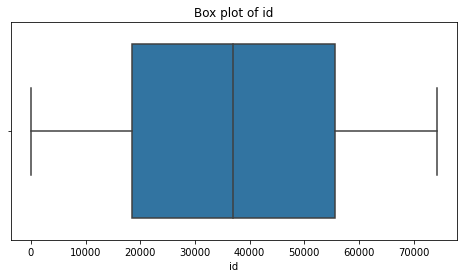

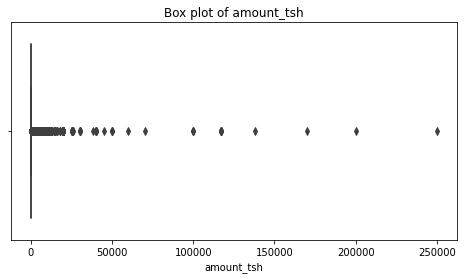

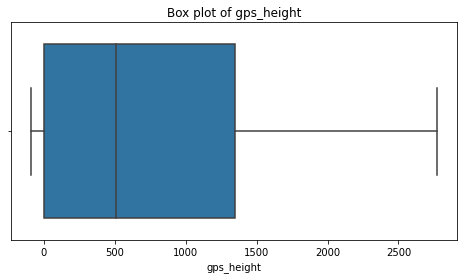

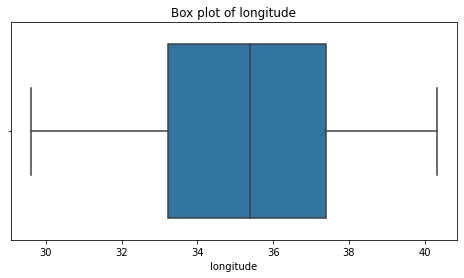

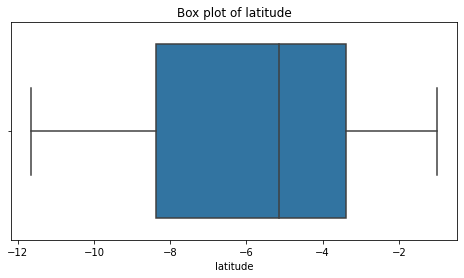

In [265]:
#Checking for outliers in numerical features
numerical_features = df_test.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [266]:
#dropping rows in longitude is 0
df_test = df_test[df_test['longitude'] != 0]

In [267]:
# checking the cleaned test dataframe
df_test

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,public_meeting,...,construction_year,extraction_type_group,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,funder_clean,decade
0,50785,0.0,dmdd,1996,DMDD,35.290799,-4.059696,Internal,Manyara,True,...,2012.0,other,parastatal,never pay,soft,seasonal,surface,other,other,10s
1,51630,0.0,government of tanzania,1569,DWE,36.656709,-3.309214,Pangani,Arusha,True,...,2000.0,gravity,user-group,never pay,soft,insufficient,groundwater,communal standpipe,government of tanzania,00s
5,52449,0.0,government of tanzania,1685,DWE,36.685279,-3.302420,Pangani,Arusha,True,...,1990.0,gravity,user-group,never pay,soft,enough,groundwater,communal standpipe,government of tanzania,90s
6,24806,0.0,government of tanzania,550,Central Government,36.398041,-7.541382,Rufiji,Iringa,True,...,2007.0,india mark ii,user-group,never pay,salty,enough,groundwater,hand pump,government of tanzania,00s
7,28965,0.0,finw,234,Finnish Government,39.607420,-10.893786,Ruvuma / Southern Coast,Mtwara,True,...,1982.0,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe,other,80s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14844,68174,0.0,netherlands,0,DWE,34.096878,-3.079689,Lake Victoria,Shinyanga,True,...,False,nira/tanira,user-group,other,soft,enough,groundwater,hand pump,netherlands,False
14845,39307,0.0,danida,34,OTHER,38.852669,-6.582841,Wami / Ruvu,Pwani,True,...,1988.0,mono,user-group,never pay,soft,enough,surface,communal standpipe,danida,80s
14846,18990,1000.0,hiap,0,OTHER,37.451633,-5.350428,Pangani,Tanga,True,...,1994.0,nira/tanira,user-group,annually,salty,insufficient,groundwater,hand pump,other,90s
14848,33492,0.0,germany,998,DWE,35.432732,-10.584159,Lake Nyasa,Ruvuma,True,...,2009.0,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe,other,00s


### EXPLORATORY DATA ANALYSIS

1.**Univariate analysis**

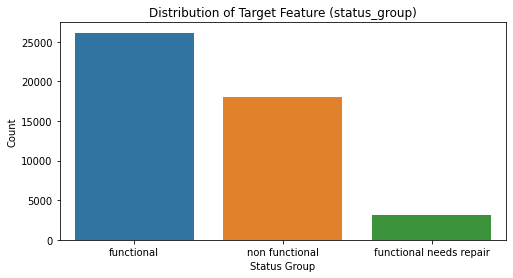

In [268]:
#target feature distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='status_group', data=df)
plt.title('Distribution of Target Feature (status_group)')
plt.xlabel('Status Group')
plt.ylabel('Count')
plt.show()


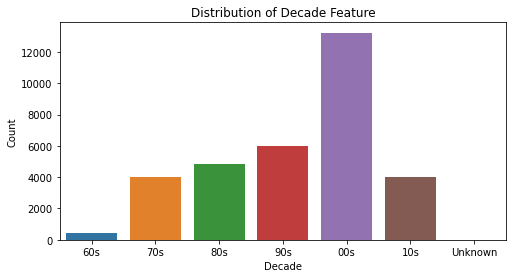

In [269]:
#distribution of decade feature
plt.figure(figsize=(8, 4))
sns.countplot(x='decade', data=df, order=['60s', '70s', '80s', '90s', '00s', '10s', 'Unknown'])
plt.title('Distribution of Decade Feature')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()


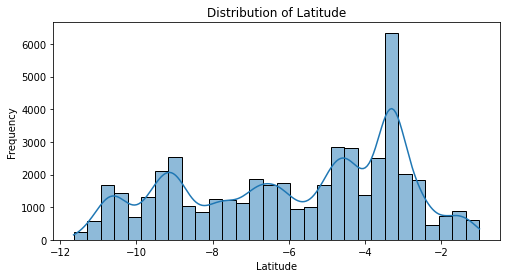

In [270]:
#distribution of latitude feature
plt.figure(figsize=(8, 4))
sns.histplot(df['latitude'], bins=30, kde=True)
plt.title('Distribution of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()


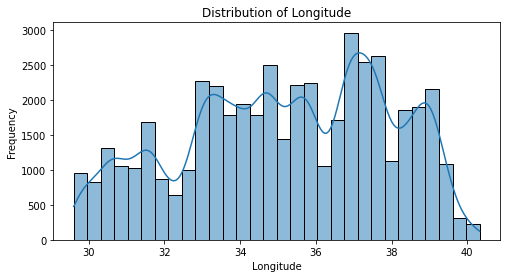

In [271]:
#distribution of longitude feature
plt.figure(figsize=(8, 4))
sns.histplot(df['longitude'], bins=30, kde=True)
plt.title('Distribution of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()


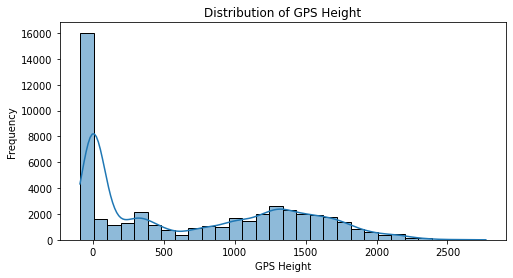

In [272]:
#distribution of gps_height feature
plt.figure(figsize=(8, 4))
sns.histplot(df['gps_height'], bins=30, kde=True)
plt.title('Distribution of GPS Height')
plt.xlabel('GPS Height')
plt.ylabel('Frequency')
plt.show()


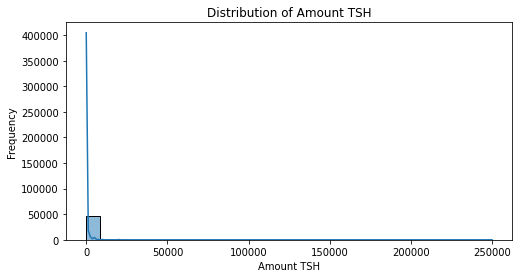

In [273]:
#distribution of amount_tsh feature
plt.figure(figsize=(8, 4))
sns.histplot(df['amount_tsh'], bins=30, kde=True)
plt.title('Distribution of Amount TSH')
plt.xlabel('Amount TSH')
plt.ylabel('Frequency')
plt.show()


In [274]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_group',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_class', 'waterpoint_type_group', 'status_group', 'decade',
       'funder_clean'],
      dtype='object')

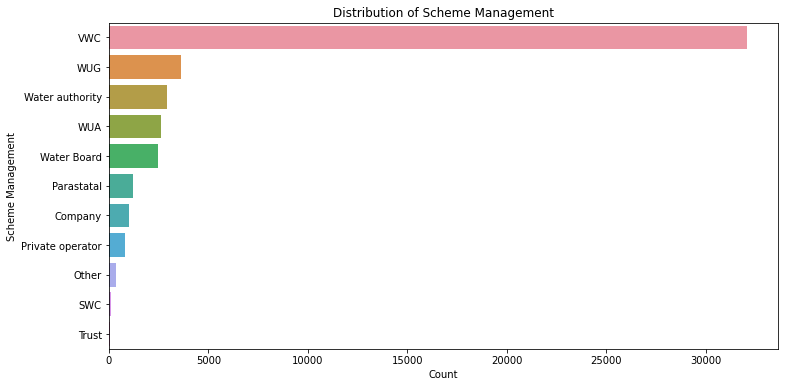

In [275]:
#distribution of scheme_management feature
plt.figure(figsize=(12, 6))
sns.countplot(y='scheme_management', data=df, order=df['scheme_management'].value_counts().index)
plt.title('Distribution of Scheme Management')
plt.xlabel('Count')
plt.ylabel('Scheme Management')
plt.show()


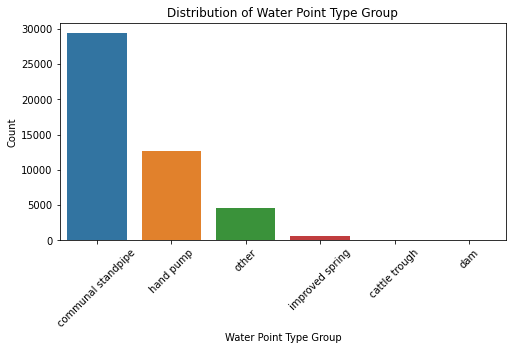

In [276]:
#distribution of water_point_type_group feature
plt.figure(figsize=(8, 4))
sns.countplot(x='waterpoint_type_group', data=df)
plt.title('Distribution of Water Point Type Group')
plt.xlabel('Water Point Type Group')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


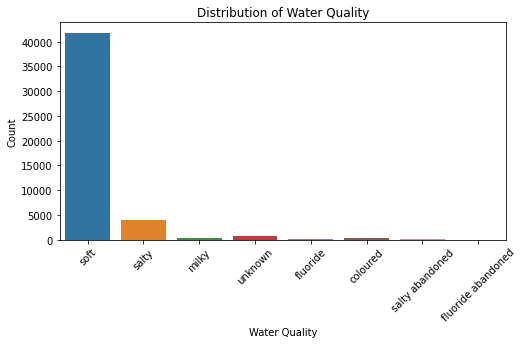

In [277]:
#distribution of water_quality feature
plt.figure(figsize=(8, 4))
sns.countplot(x='water_quality', data=df)
plt.title('Distribution of Water Quality')
plt.xlabel('Water Quality')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


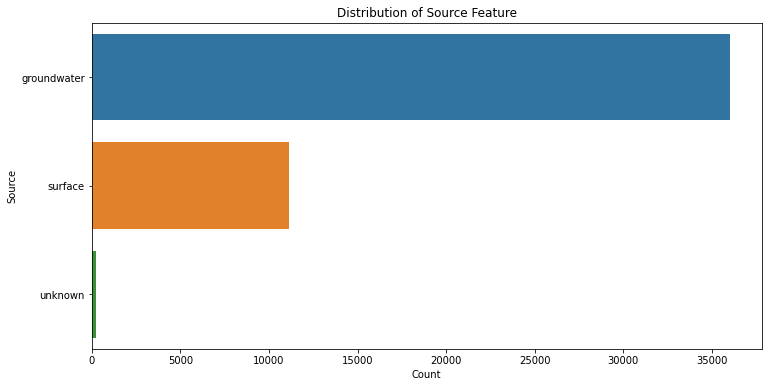

In [278]:
#distribution of source feature
plt.figure(figsize=(12, 6))
sns.countplot(y='source_class', data=df, order=df['source_class'].value_counts().index)
plt.title('Distribution of Source Feature')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()


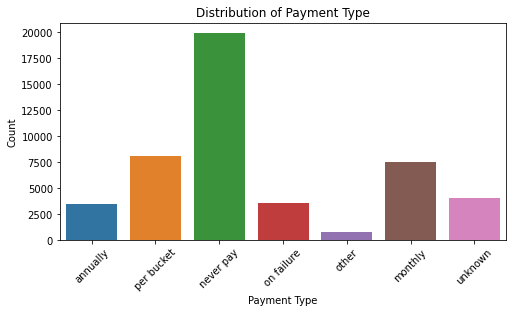

In [279]:
# distribution of payment_type feature
plt.figure(figsize=(8, 4))
sns.countplot(x='payment_type', data=df)
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='installer'>

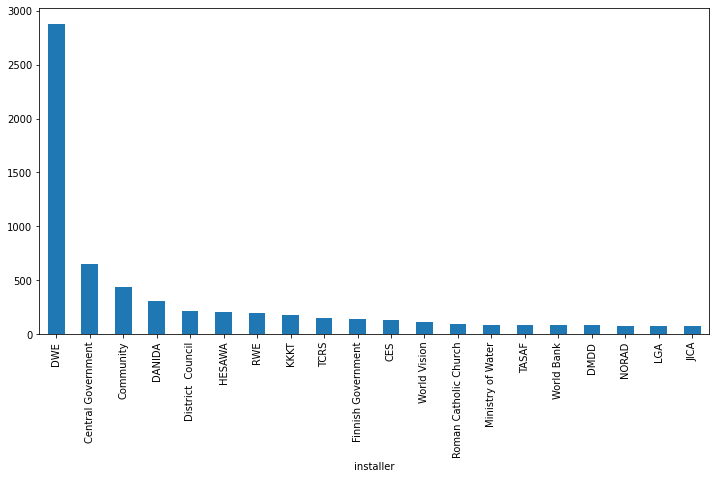

In [280]:
# distribution of installer feature
df["installer"].value_counts().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,6))


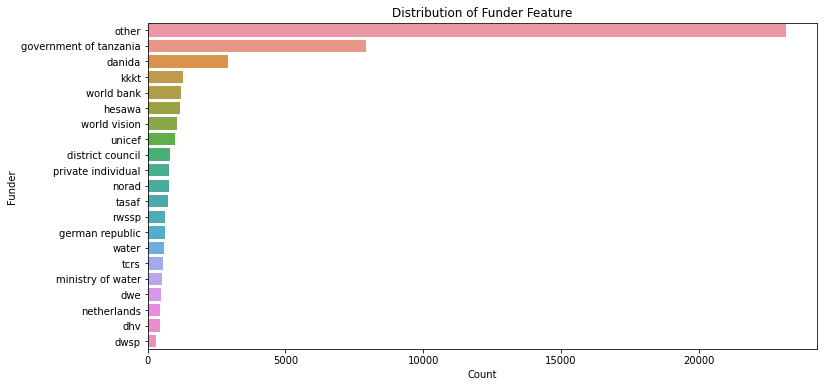

In [281]:
# distribution of funder_clean feature
plt.figure(figsize=(12, 6))
sns.countplot(y='funder_clean', data=df, order=df['funder_clean'].value_counts().index)
plt.title('Distribution of Funder Feature')
plt.xlabel('Count')
plt.ylabel('Funder')
plt.show()


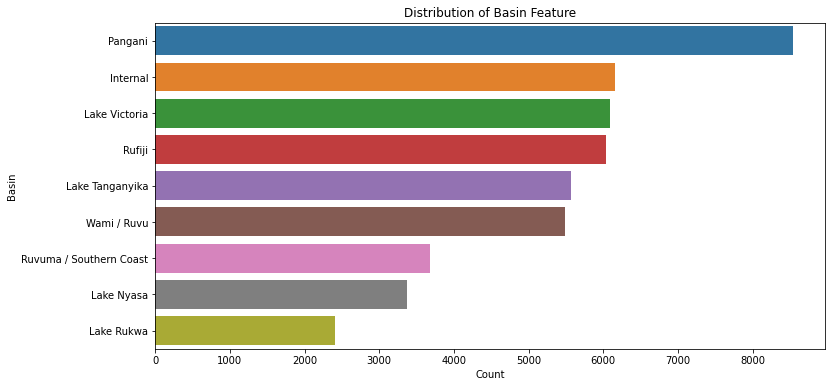

In [282]:
# distribution of basin feature
plt.figure(figsize=(12, 6))
sns.countplot(y='basin', data=df, order=df['basin'].value_counts().index)
plt.title('Distribution of Basin Feature')
plt.xlabel('Count')
plt.ylabel('Basin')
plt.show()


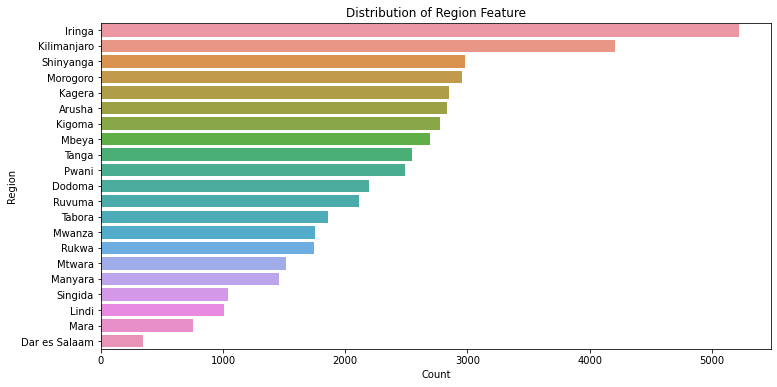

In [283]:
# distribution of region feature
plt.figure(figsize=(12, 6))
sns.countplot(y='region', data=df, order=df['region'].value_counts().index)
plt.title('Distribution of Region Feature')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


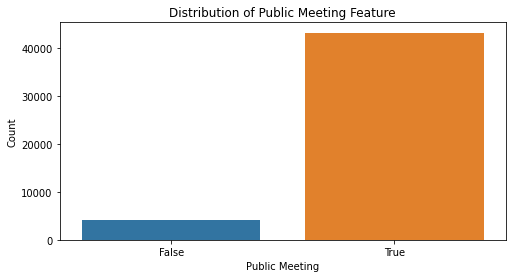

In [284]:
# distribution of public_meeting feature
plt.figure(figsize=(8, 4))
sns.countplot(x='public_meeting', data=df)
plt.title('Distribution of Public Meeting Feature')
plt.xlabel('Public Meeting')
plt.ylabel('Count')
plt.show()


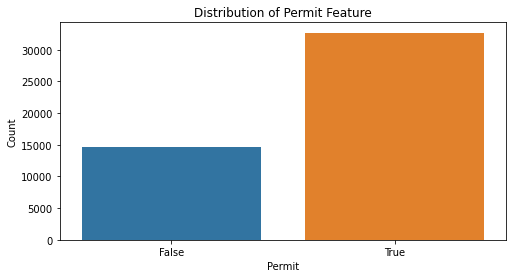

In [285]:
# distribution of permit feature
plt.figure(figsize=(8, 4))
sns.countplot(x='permit', data=df)
plt.title('Distribution of Permit Feature')
plt.xlabel('Permit')
plt.ylabel('Count')
plt.show()


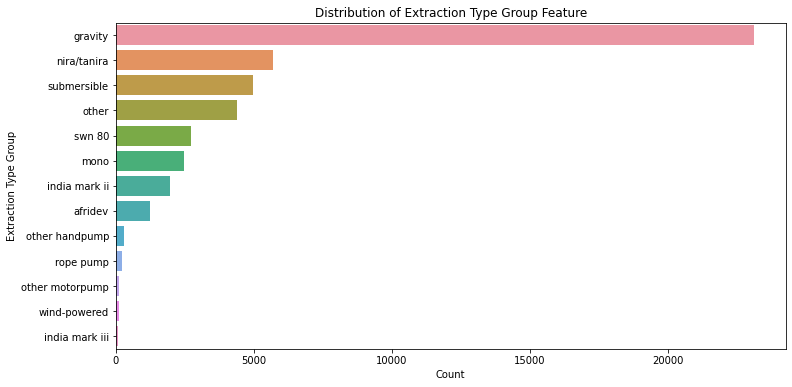

In [286]:
# distribution of extraction_type_group feature
plt.figure(figsize=(12, 6))
sns.countplot(y='extraction_type_group', data=df, order=df['extraction_type_group'].value_counts().index)
plt.title('Distribution of Extraction Type Group Feature')
plt.xlabel('Count')
plt.ylabel('Extraction Type Group')
plt.show()


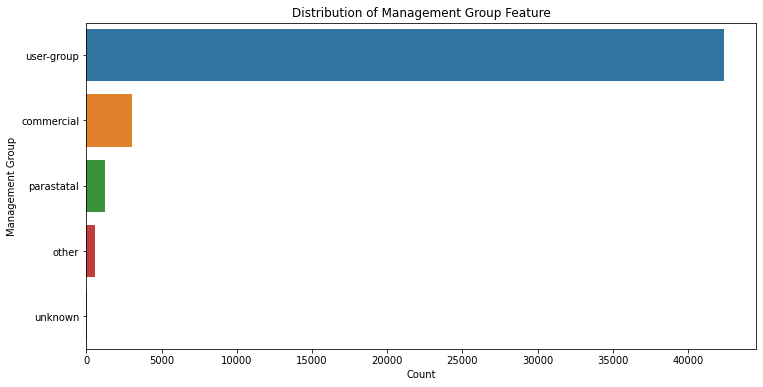

In [287]:
# distribution of management_group feature
plt.figure(figsize=(12, 6))
sns.countplot(y='management_group', data=df, order=df['management_group'].value_counts().index)
plt.title('Distribution of Management Group Feature')
plt.xlabel('Count')
plt.ylabel('Management Group')
plt.show()


#### 2.Bivariate Analysis

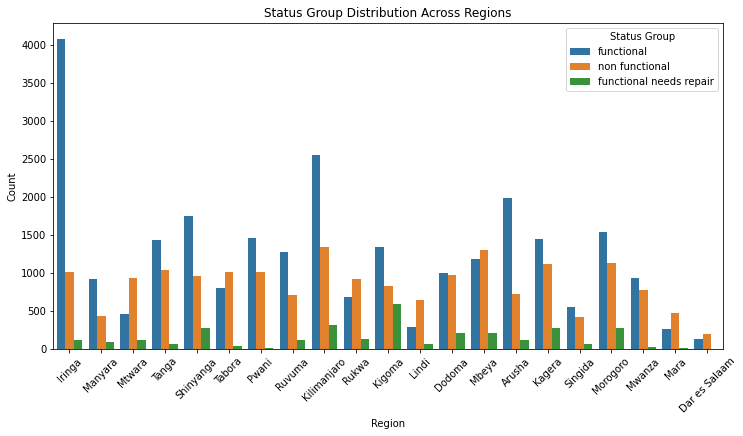

In [288]:
# Distribution of target feature across different regions
plt.figure(figsize=(12, 6))
sns.countplot(x='region', hue='status_group', data=df)
plt.title('Status Group Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status Group')
plt.show()


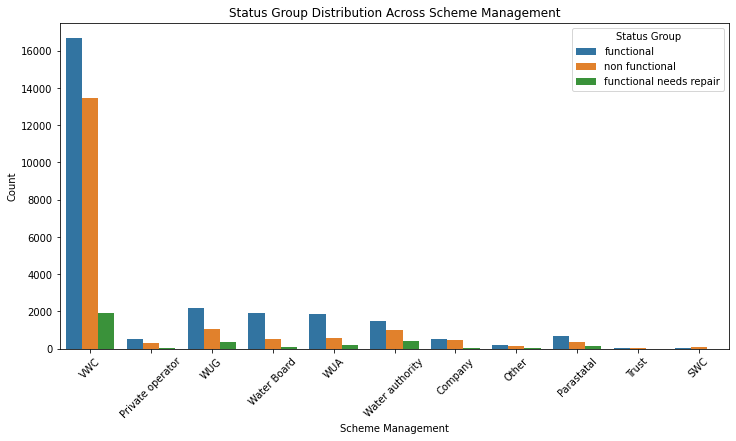

In [289]:
# distribution of target feature across different scheme_management
plt.figure(figsize=(12, 6))
sns.countplot(x='scheme_management', hue='status_group', data=df)
plt.title('Status Group Distribution Across Scheme Management')
plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status Group')
plt.show()


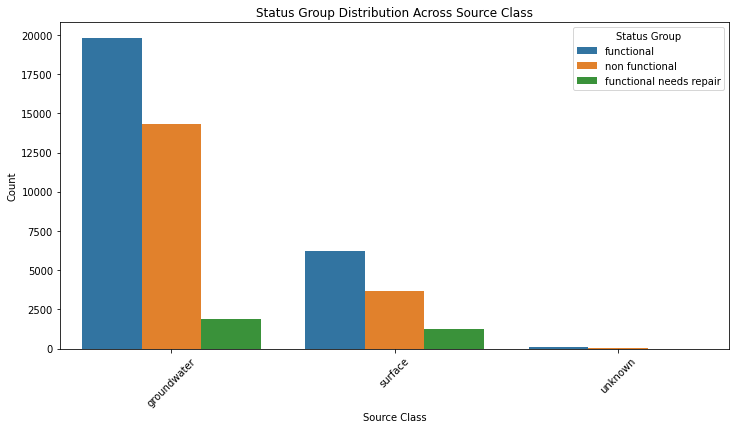

In [290]:
# distribution of target feature across different source_class
plt.figure(figsize=(12, 6))
sns.countplot(x='source_class', hue='status_group', data=df)
plt.title('Status Group Distribution Across Source Class')
plt.xlabel('Source Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status Group')
plt.show()


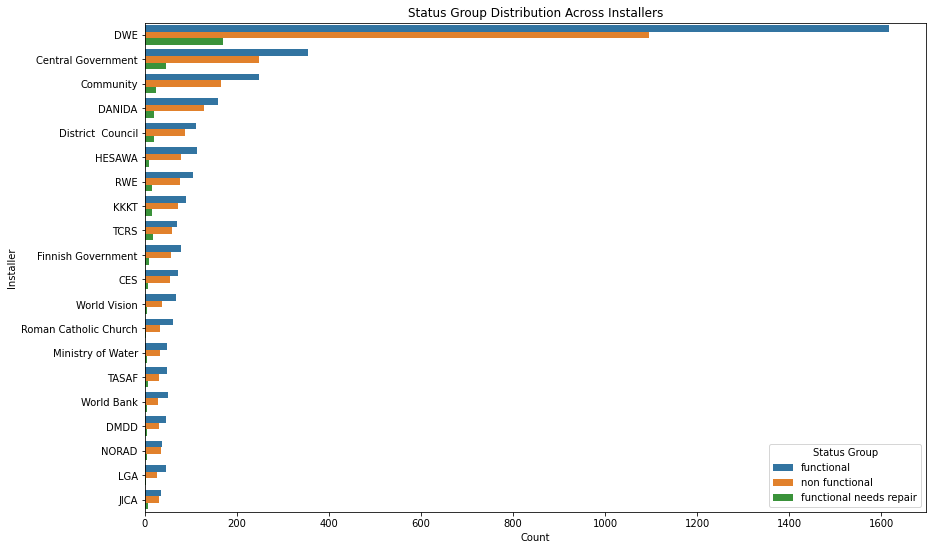

In [291]:
# distribution of target feature across different installer
plt.figure(figsize=(14, 9))
sns.countplot(y='installer', hue='status_group', data=df, order=df['installer'].value_counts().head(20).index)
plt.title('Status Group Distribution Across Installers')
plt.xlabel('Count')
plt.ylabel('Installer')
plt.legend(title='Status Group')
plt.show()


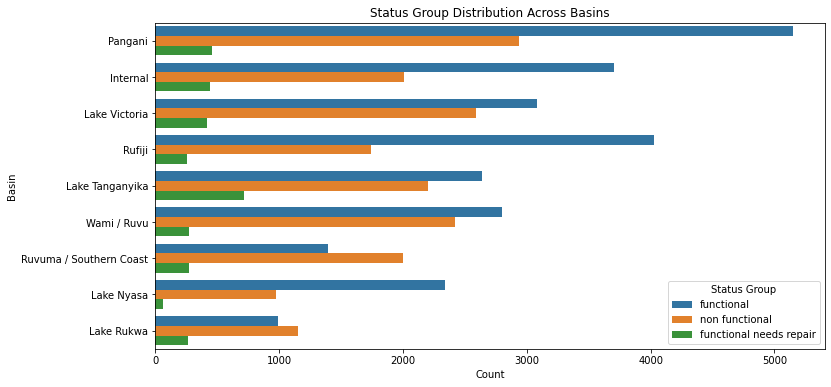

In [292]:
# distribution of basin by target feature
plt.figure(figsize=(12, 6))
sns.countplot(y='basin', hue='status_group', data=df, order=df['basin'].value_counts().index)
plt.title('Status Group Distribution Across Basins')
plt.xlabel('Count')
plt.ylabel('Basin')
plt.legend(title='Status Group')
plt.show()

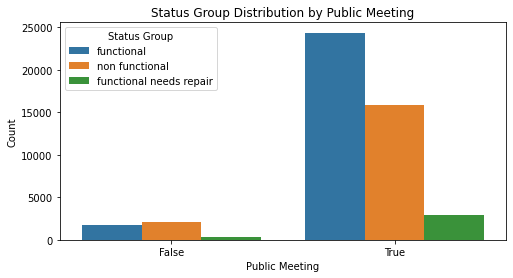

In [293]:
# distribution of public_meeting by target feature
plt.figure(figsize=(8, 4))
sns.countplot(x='public_meeting', hue='status_group', data=df)
plt.title('Status Group Distribution by Public Meeting')
plt.xlabel('Public Meeting')
plt.ylabel('Count')
plt.legend(title='Status Group')
plt.show()


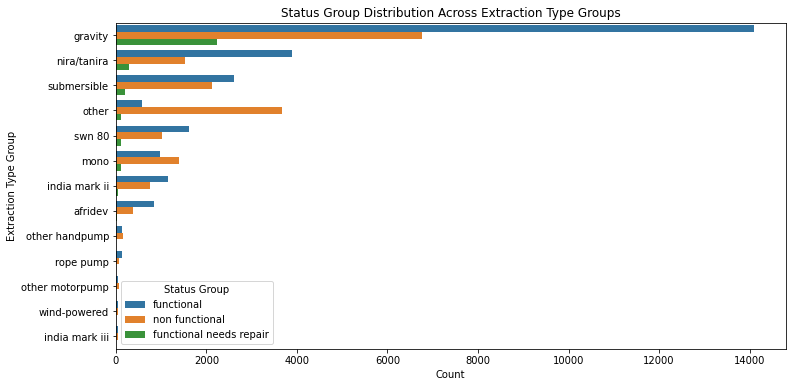

In [294]:
# distribution of extraction_type_group by target feature
plt.figure(figsize=(12, 6))
sns.countplot(y='extraction_type_group', hue='status_group', data=df, order=df['extraction_type_group'].value_counts().index)
plt.title('Status Group Distribution Across Extraction Type Groups')
plt.xlabel('Count')
plt.ylabel('Extraction Type Group')
plt.legend(title='Status Group')
plt.show()


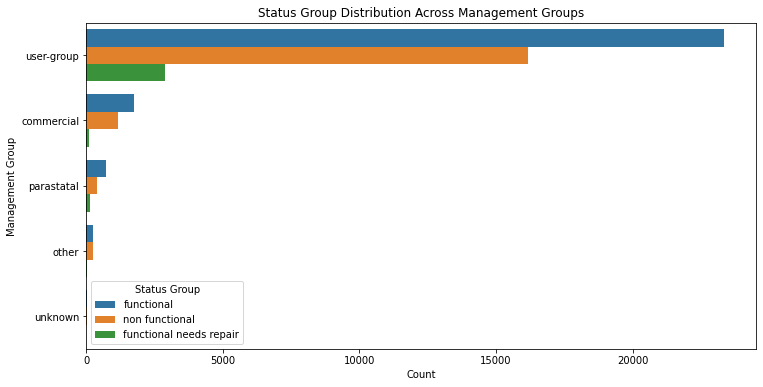

In [295]:
#distribution of management_group by target feature
plt.figure(figsize=(12, 6))
sns.countplot(y='management_group', hue='status_group', data=df, order=df['management_group'].value_counts().index)
plt.title('Status Group Distribution Across Management Groups')
plt.xlabel('Count')
plt.ylabel('Management Group')
plt.legend(title='Status Group')
plt.show()


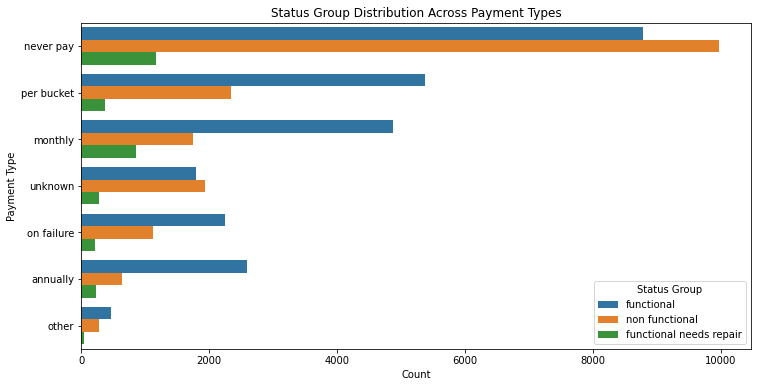

In [296]:
#distribution of payment_type by target feature
plt.figure(figsize=(12, 6))
sns.countplot(y='payment_type', hue='status_group', data=df, order=df['payment_type'].value_counts().index)
plt.title('Status Group Distribution Across Payment Types')
plt.xlabel('Count')
plt.ylabel('Payment Type')
plt.legend(title='Status Group')
plt.show()


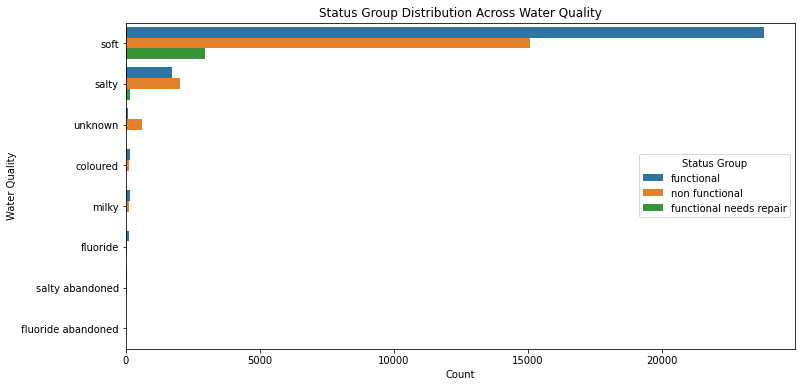

In [297]:
# distribution of water_quality by target feature
plt.figure(figsize=(12, 6))
sns.countplot(y='water_quality', hue='status_group', data=df, order=df['water_quality'].value_counts().index)
plt.title('Status Group Distribution Across Water Quality')
plt.xlabel('Count')
plt.ylabel('Water Quality')
plt.legend(title='Status Group')
plt.show()


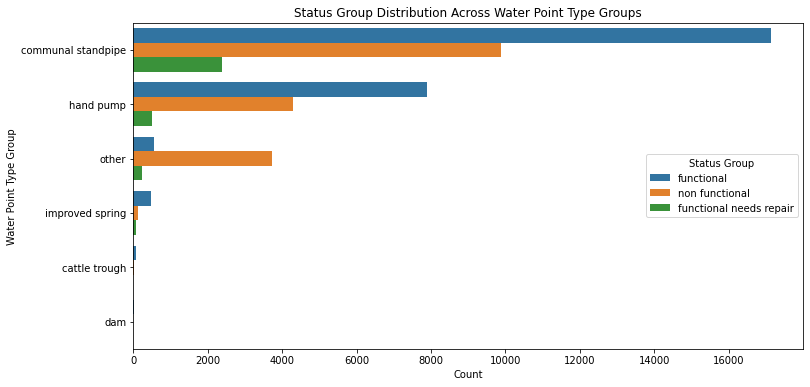

In [298]:
# distribution of waterpoint_type_group by target feature
plt.figure(figsize=(12, 6))
sns.countplot(y='waterpoint_type_group', hue='status_group', data=df, order=df['waterpoint_type_group'].value_counts().index)
plt.title('Status Group Distribution Across Water Point Type Groups')
plt.xlabel('Count')
plt.ylabel('Water Point Type Group')
plt.legend(title='Status Group')
plt.show()


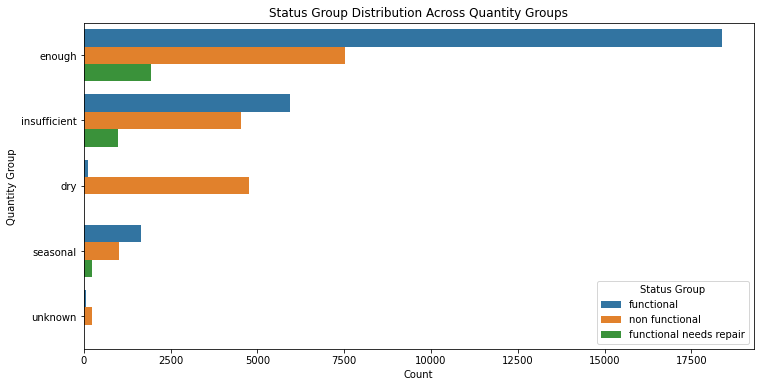

In [299]:
# distribution of quantity_group by target feature
plt.figure(figsize=(12, 6))
sns.countplot(y='quantity_group', hue='status_group', data=df, order=df['quantity_group'].value_counts().index)
plt.title('Status Group Distribution Across Quantity Groups')
plt.xlabel('Count')
plt.ylabel('Quantity Group')
plt.legend(title='Status Group')
plt.show()


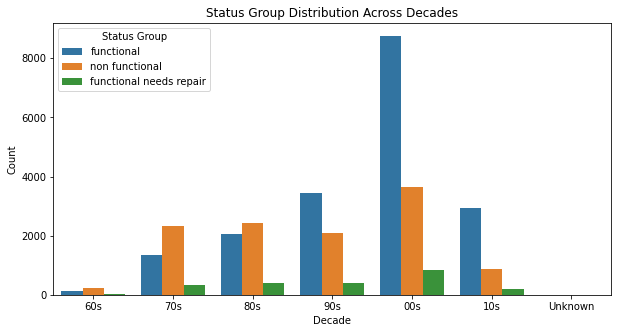

In [300]:
# distribution of decade by target feature
plt.figure(figsize=(10, 5))
sns.countplot(x='decade', hue='status_group', data=df, order=['60s', '70s', '80s', '90s', '00s', '10s', 'Unknown'])
plt.title('Status Group Distribution Across Decades')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.legend(title='Status Group')
plt.show()


#### 3. Multivariate Analysis

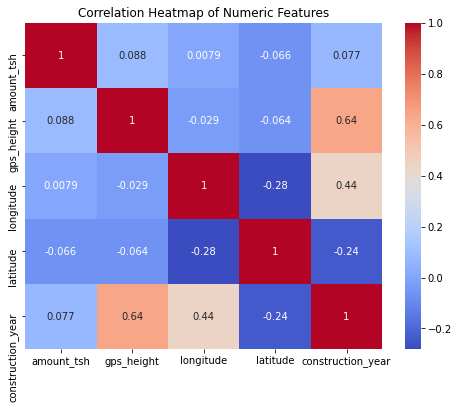

In [301]:
# correlation heatmap for numerical features
num_cols = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'construction_year']
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [302]:
# Crosstab of funder_clean and region against status_group
pd.crosstab([df['funder_clean'], df['region']], df['status_group'], normalize='index')



status_group            functional  functional needs repair  non functional
funder_clean region                                                        
danida       Iringa       0.774291                 0.015182        0.210526
             Kagera       0.229508                 0.081967        0.688525
             Kigoma       0.605882                 0.205882        0.188235
             Mbeya        0.363748                 0.033292        0.602959
             Morogoro     0.500000                 0.500000        0.000000
...                            ...                      ...             ...
world vision Morogoro     0.500000                 0.500000        0.000000
             Shinyanga    0.656766                 0.158416        0.184818
             Singida      0.850000                 0.025000        0.125000
             Tabora       0.546926                 0.032362        0.420712
             Tanga        0.470588                 0.058824        0.470588

[196 rows x 3 columns]

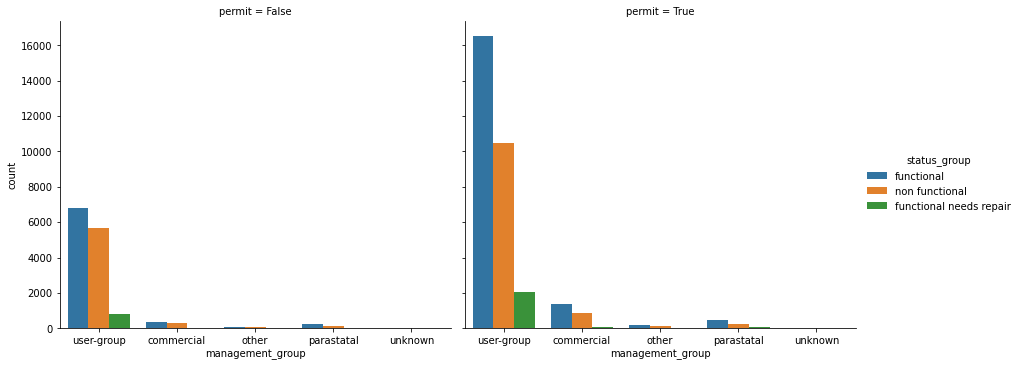

In [303]:
# Multi-faceted count plot of management_group vs status_group, separated by permit
sns.catplot(
    data=df, x="management_group", hue="status_group", col="permit",
    kind="count", height=5, aspect=1.2
);


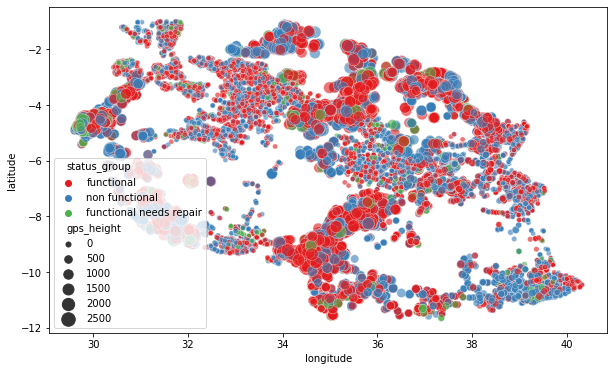

In [304]:
# Geographical scatter plot of longitude vs latitude, colored by status_group and sized by gps_height
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x="longitude", y="latitude",
    hue="status_group", size="gps_height",
    sizes=(20, 200), alpha=0.6, palette="Set1"
);




## 📊 Hypotheses & Statistical Tests

In this section, we validate key assumptions about water well functionality using statistical tests.  
We will test numeric and categorical predictors against the target variable (`status_group`).

---

### 🔹 Hypothesis 1: GPS Height
- **Null (H₀):** There is no difference in `gps_height` between functional, non-functional, and needs-repair wells.  
- **Alternative (H₁):** There is a significant difference in `gps_height` across well status groups.  
- **Test:** ANOVA & Kruskal–Wallis (since data may not be normally distributed).


In [305]:
from scipy.stats import f_oneway, kruskal

# Split gps_height by status groups
groups = [df.loc[df['status_group']==cls, 'gps_height'].dropna()
          for cls in df['status_group'].unique()]

# ANOVA (parametric)
anova_res = f_oneway(*groups)
# Kruskal-Wallis (non-parametric)
kruskal_res = kruskal(*groups)

anova_res, kruskal_res


(F_onewayResult(statistic=553.7487499712857, pvalue=1.9099733533642773e-238),
 KruskalResult(statistic=910.691888916167, pvalue=1.761038962949523e-198))

Interpretation: p ≪ 0.05 → Reject H₀.
There is a significant difference in gps_height across well statuses.
Meaning: Wells at different elevations show different functionality patterns.

### 🔹 Hypothesis 2: Construction Year
- **Null (H₀):** Construction year has no relationship with well functionality.  
- **Alternative (H₁):** Older wells are more likely to be non-functional.  
- **Test:** ANOVA & Kruskal–Wallis.


In [306]:
groups = [df.loc[df['status_group']==cls, 'construction_year'].replace(0, np.nan).dropna()
          for cls in df['status_group'].unique()]

anova_res = f_oneway(*groups)
kruskal_res = kruskal(*groups)

anova_res, kruskal_res


(F_onewayResult(statistic=1341.68025421114, pvalue=0.0),
 KruskalResult(statistic=2297.0986332841526, pvalue=0.0))

Strong evidence against H₀......
Well functionality is highly dependent on construction year.
Meaning: Older wells fail more often, confirming expectations.

### 🔹 Hypothesis 3: Management Group
- **Null (H₀):** `management_group` has no effect on well status.  
- **Alternative (H₁):** Wells managed by user-groups perform better than commercial or private ones.  
- **Test:** Chi-square test of independence.

In [307]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['management_group'], df['status_group'])
chi2, p, dof, expected = chi2_contingency(contingency)

chi2, p

(118.22547894619667, 7.705062190670837e-22)

Reject H₀.
management_group is significantly related to well functionality.
Meaning: User-managed wells perform differently than government or private-managed ones (likely better, since community involvement improves upkeep).

### 🔹 Hypothesis 4: Permit Status
- **Null (H₀):** Permit status does not affect well functionality.  
- **Alternative (H₁):** Wells with permits are more functional.  
- **Test:** Chi-square.


In [308]:
contingency = pd.crosstab(df['permit'], df['status_group'])
chi2, p, dof, expected = chi2_contingency(contingency)

chi2, p


(191.21973308329189, 3.000285239867027e-42)

Since p ≪ 0.05, we reject the null hypothesis (H₀).
This means permit status is strongly associated with well functionality.

Practical meaning: Wells with official permits are significantly more likely to be functional than those without permits. This could reflect better oversight, compliance, and investment when permits are issued.

### 🔹 Hypothesis 5: Water Quality
- **Null (H₀):** Water quality has no effect on well status.  
- **Alternative (H₁):** Water quality (safe vs salty vs unknown) significantly influences functionality.  
- **Test:** Chi-square.


In [309]:
contingency = pd.crosstab(df['water_quality'], df['status_group'])
chi2, p, dof, expected = chi2_contingency(contingency)

chi2, p

(1111.4649480506876, 1.8408612844286992e-228)

We reject H₀. Water quality is highly associated with well functionality.
Meaning: Wells with poor or salty water are more likely to be non-functional, while those with good quality water are more likely functional.

### 🔹 Hypothesis 6: Public Meeting
- **Null (H₀):** Holding a public meeting has no relationship with functionality.  
- **Alternative (H₁):** Wells with public meetings are more functional.  
- **Test:** Chi-square.


In [310]:
contingency = pd.crosstab(df['public_meeting'], df['status_group'])
chi2, p, dof, expected = chi2_contingency(contingency)

chi2, p


(326.27651112606, 1.4123938623940524e-71)

We reject H₀. Holding a public meeting is significantly associated with well functionality.
Meaning: Wells where communities had public meetings (e.g., planning, maintenance) tend to be more sustainable.

### MODELING
**DATA PREPROCESSING**

In [311]:
# Preparing data for modeling
X = df.drop(columns=['status_group'])
y = df["status_group"]

X_test = df_test

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((37859, 22), (11868, 22))

In [312]:
from sklearn.metrics import confusion_matrix

class_names = ['functional', 'functional needs repair', 'non functional']

def plot_confusion_matrix(y_true, y_pred, model_name, class_names):
    """
    This function plots a confusion matrix using a heatmap.

    Args:
        y_true (array-like): The true labels.
        y_pred (array-like): The predicted labels from the model.
        model_name (str): The name of the model for the plot title.
        class_names (list): A list of the class names.
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create the heatmap plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [313]:
ohe = OneHotEncoder(categories='auto', sparse=False, drop='first')
ss = StandardScaler()

In [314]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [315]:

categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Convert all selected columns to string type in both the training and test sets
X_train[categorical_cols] = X_train[categorical_cols].astype(str)
X_test[categorical_cols] = X_test[categorical_cols].astype(str)

# initializing the OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training data using ONLY the now-uniform categorical columns
X_train_cat = ohe.fit_transform(X_train[categorical_cols])

# Transform the test data using the fitted encoder
X_test_cat = ohe.transform(X_test[categorical_cols])

# You can now get the feature names to see the result
feature_names = ohe.get_feature_names_out(categorical_cols)

print("One-hot encoding successful. The shape of the transformed training data is:")
print(X_train_cat.shape)
print("\nThe first 5 feature names are:")
print(feature_names[:5])

One-hot encoding successful. The shape of the transformed training data is:
(37859, 2211)

The first 5 feature names are:
['funder_a/co germany' 'funder_aar' 'funder_abas ka' 'funder_abasia'
 'funder_abc-ihushi development cent']


 Logistic Regression 📉

Logistic Regression Accuracy: 0.6342313787638669

Logistic Regression Classification Report:
                          precision    recall  f1-score   support

             functional       0.83      0.61      0.70      5227
functional needs repair       0.18      0.66      0.28       632
         non functional       0.73      0.66      0.70      3606

               accuracy                           0.63      9465
              macro avg       0.58      0.64      0.56      9465
           weighted avg       0.75      0.63      0.67      9465



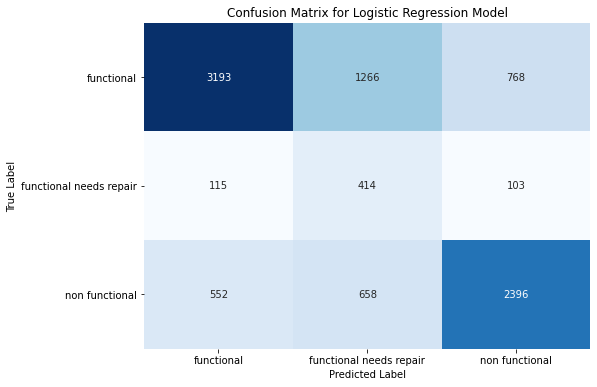

In [316]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_sample_weight

# Your existing code to prepare data and create the preprocessor is assumed to be above this point
# The preprocessor is already defined

# Initialize the Logistic Regression model
# The 'multi_class' and 'solver' parameters are set for multi-class classification
# The `class_weight` parameter handles the class imbalance for you
logreg_classifier = LogisticRegression(
    max_iter=1000, # A higher max_iter can help with convergence
    random_state=42,
    class_weight='balanced', # This parameter handles imbalance automatically
    solver='lbfgs' # A common and robust solver for multi-class problems
)

# Create the full pipeline with the Logistic Regression classifier
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_classifier)
])

# Fit the Logistic Regression pipeline on the main training data
logreg_pipeline.fit(X_train, y_train)

# Make predictions on your validation set (X_val)
y_pred_logreg_val = logreg_pipeline.predict(X_val)

# Print the overall accuracy and a detailed classification report
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg_val))
print("\nLogistic Regression Classification Report:\n", classification_report(y_val, y_pred_logreg_val))

plot_confusion_matrix(y_val, y_pred_logreg_val, "Logistic Regression Model", class_names)


Serving as a simple baseline, this model had the lowest overall accuracy (0.63). While it did achieve a decent recall (0.66) for the broken pumps, its very low precision (0.18) means most of its predictions for this class were wrong. It's a useful starting point but not a practical solution.

Random Forest 🌳

Random Forest: 0.788906497622821

Random Forest Classification Report:
                          precision    recall  f1-score   support

             functional       0.78      0.90      0.84      5227
functional needs repair       0.57      0.13      0.21       632
         non functional       0.81      0.75      0.78      3606

               accuracy                           0.79      9465
              macro avg       0.72      0.59      0.61      9465
           weighted avg       0.78      0.79      0.77      9465



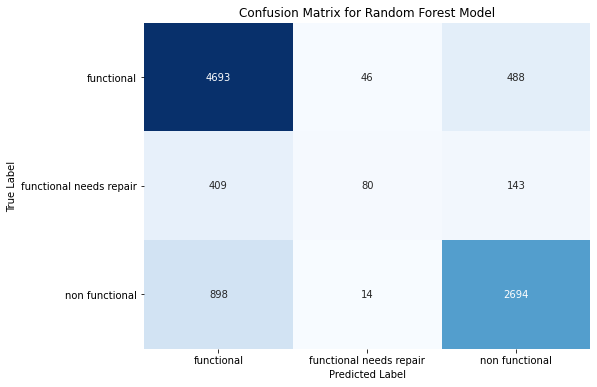

In [317]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Define the features based on their data types
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create the full pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the entire pipeline on the training data only
model_pipeline.fit(X_train, y_train)

# Make predictions on the validation set using the fitted pipeline
y_pred_val = model_pipeline.predict(X_val)

print("Random Forest:", accuracy_score(y_val, y_pred_val))

print("\nRandom Forest Classification Report:\n", classification_report(y_val, y_pred_val))

plot_confusion_matrix(y_val, y_pred_val, "Random Forest Model", class_names)



This model had the highest overall accuracy (0.79) and performed best on the majority classes. However, it was poor at finding broken pumps, with a very low recall (0.13) for the 'functional needs repair' class. It's great for general correctness but fails at identifying rare, critical events.

 XGBoost 🚀

[22:24:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Accuracy: 0.7064976228209192

XGBoost Classification Report:
                          precision    recall  f1-score   support

             functional       0.82      0.73      0.77      5227
functional needs repair       0.23      0.67      0.34       632
         non functional       0.83      0.68      0.74      3606

               accuracy                           0.71      9465
              macro avg       0.63      0.69      0.62      9465
           weighted avg       0.78      0.71      0.73      9465



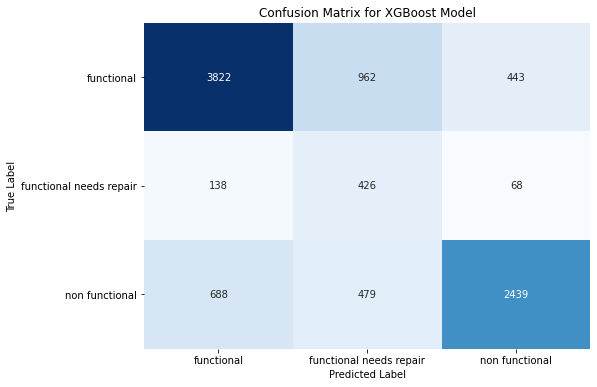

In [318]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_sample_weight

# Your existing code to prepare data and create the preprocessor is assumed to be above this point
# The preprocessor is already defined

# Initialize the XGBoost model with hyperparameters
# For multi-class classification, use 'multi:softprob' and a suitable evaluation metric
# We'll also use `use_label_encoder=False` to avoid a warning
xgb_classifier = XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='merror' # 'merror' is a common metric for multiclass problems
)

# Create the full pipeline with the XGBoost classifier
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_classifier)
])

# Fit the XGBoost pipeline on the main training data.
# It's important to use the `sample_weight` parameter to address class imbalance.
# First, calculate the weights for the training data.
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Fit the pipeline with the sample weights.
# Note: You must pass the sample weights to the 'classifier' step.
xgb_pipeline.fit(X_train, y_train, classifier__sample_weight=sample_weights)

# Make predictions on your validation set (X_val)
y_pred_xgb_val = xgb_pipeline.predict(X_val)

# Print the overall accuracy of the XGBoost model on the validation set
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb_val))

# Print a detailed classification report for the XGBoost model
print("\nXGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb_val))

# Optional: Predict on the final test set (X_test) for submission
y_pred_test_xgb = xgb_pipeline.predict(X_test)
# You would then save y_pred_test_xgb to a CSV file for submission.

plot_confusion_matrix(y_val, y_pred_xgb_val, "XGBoost Model", class_names)

This model is the most practical choice. Its overall accuracy (0.71) is a good middle ground. Most importantly, it had the highest recall (0.67) for the 'functional needs repair' class. This means it's the best model at finding broken pumps, which is the most critical task in this problem. It prioritizes finding all broken pumps over avoiding false alarms.

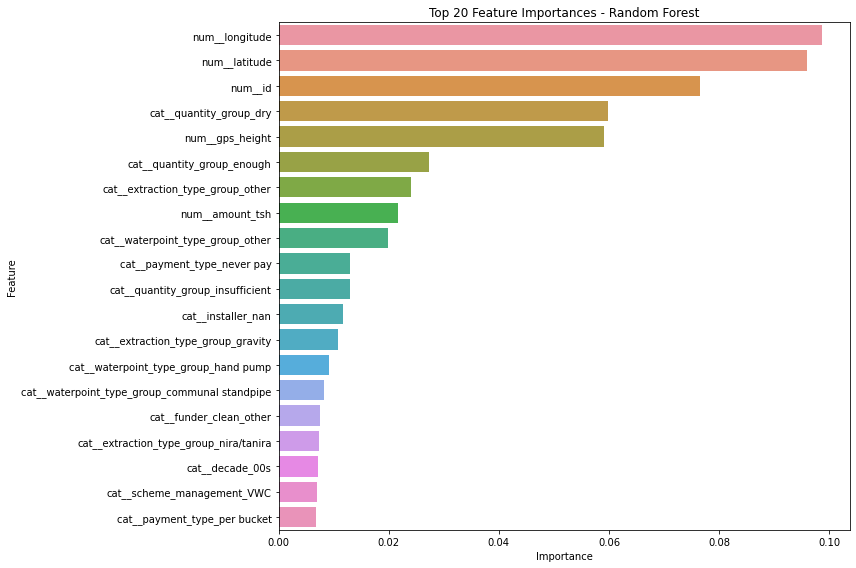

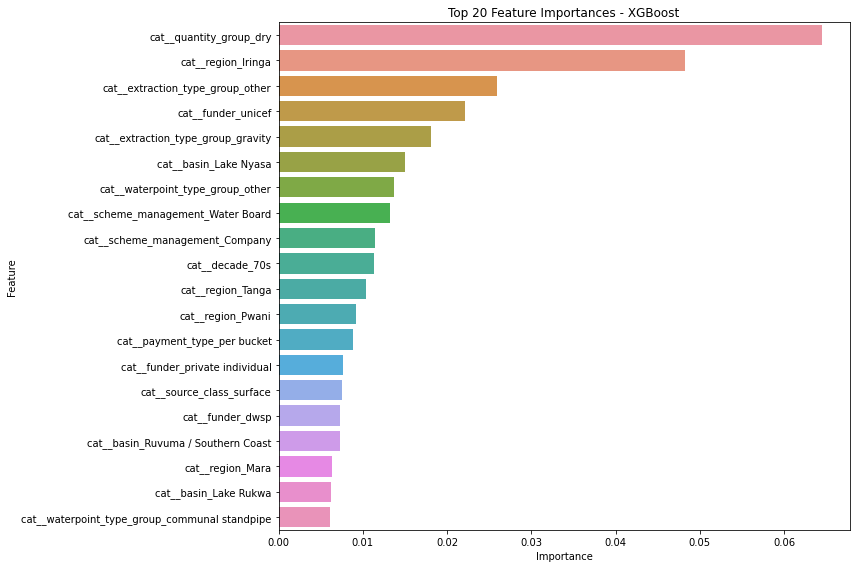

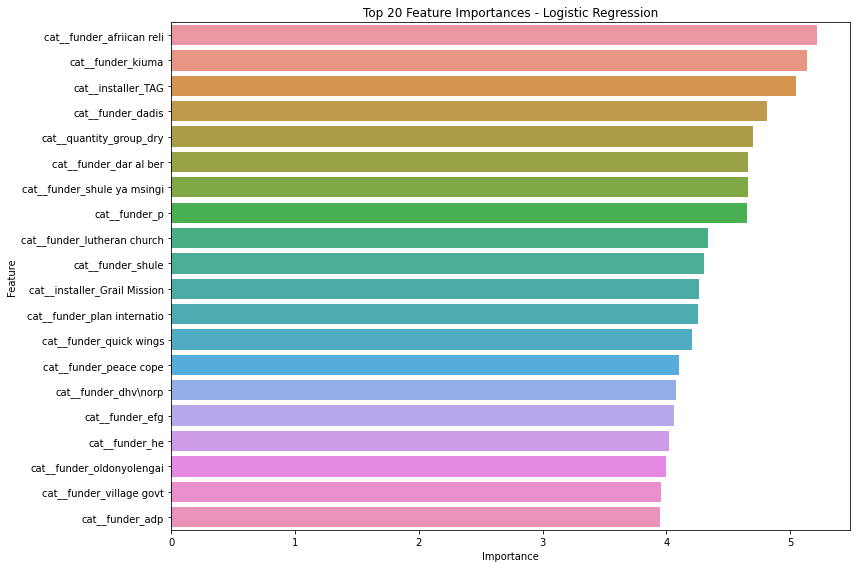

In [319]:
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# 2. Get and sort feature importances for Random Forest.
rf_importances = model_pipeline.named_steps['classifier'].feature_importances_
rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_importances
}).sort_values('importance', ascending=False)

# 3. Get and sort feature importances for XGBoost.
xgb_importances = xgb_pipeline.named_steps['classifier'].feature_importances_
xgb_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_importances
}).sort_values('importance', ascending=False)

# 4. Get and sort feature importances for Logistic Regression.
logreg_coefficients = logreg_pipeline.named_steps['classifier'].coef_
# Sum the absolute coefficients across all classes for an overall importance score.
logreg_importances = np.sum(np.abs(logreg_coefficients), axis=0)
logreg_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': logreg_importances
}).sort_values('importance', ascending=False)

# 5. Visualize the top 20 features for each model.
def plot_importances(df, title):
    """Plots the top 20 feature importances from a DataFrame."""
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=df.head(20))
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

plot_importances(rf_importance_df, 'Top 20 Feature Importances - Random Forest')
plot_importances(xgb_importance_df, 'Top 20 Feature Importances - XGBoost')
plot_importances(logreg_importance_df, 'Top 20 Feature Importances - Logistic Regression')

In [320]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Assuming you have your preprocessor pipeline and data split (X_train, y_train) from your previous code.
# The preprocessor pipeline should be a ColumnTransformer or similar.

# Step 1: Preprocess the training data to convert all columns to numerical format.
# Use `fit_transform` to fit the preprocessor and transform the training data.
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Step 2: Now apply SMOTE to the preprocessed numerical data.
print(f"Original preprocessed dataset shape: {X_train_preprocessed.shape}")
print(f"Original class distribution: {Counter(y_train)}")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

print(f"Resampled preprocessed dataset shape: {X_train_resampled.shape}")
print(f"Resampled class distribution: {Counter(y_train_resampled)}")

# Step 3: Train your model on the new, balanced data.
# Note: You can't use the full pipeline here because SMOTE is applied outside it.
# You must fit the model (e.g., RandomForestClassifier) directly on the resampled data.

# Step 4: After training, remember to transform your validation data before prediction.
# Use `transform` to apply the already fitted preprocessor.
X_val_preprocessed = preprocessor.transform(X_val)

# Now you can make predictions
# y_pred_val = model.predict(X_val_preprocessed)

Original preprocessed dataset shape: (37859, 2216)
Original class distribution: Counter({'functional': 20906, 'non functional': 14425, 'functional needs repair': 2528})
Resampled preprocessed dataset shape: (62718, 2216)
Resampled class distribution: Counter({'functional': 20906, 'non functional': 20906, 'functional needs repair': 20906})


In [321]:
# Initialize the XGBoost classifier
xgb_model_resampled = XGBClassifier(
    objective='multi:softprob',
    eval_metric='merror',
    use_label_encoder=False
)

# Train the model on the resampled data
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

[22:28:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [322]:
# Preprocess the validation data using the pre-fitted preprocessor
X_val_preprocessed = preprocessor.transform(X_val)

# Make predictions
y_pred_resampled = xgb_model_resampled.predict(X_val_preprocessed)

# Evaluate the model
print("XGBoost with SMOTE Accuracy:", accuracy_score(y_val, y_pred_resampled))
print("\nXGBoost with SMOTE Classification Report:\n", classification_report(y_val, y_pred_resampled))

XGBoost with SMOTE Accuracy: 0.7694664553618595

XGBoost with SMOTE Classification Report:
                          precision    recall  f1-score   support

             functional       0.75      0.92      0.82      5227
functional needs repair       0.51      0.16      0.24       632
         non functional       0.84      0.67      0.74      3606

               accuracy                           0.77      9465
              macro avg       0.70      0.58      0.60      9465
           weighted avg       0.77      0.77      0.75      9465



In [323]:
# Initialize the Random Forest classifier
rf_model_resampled = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the SMOTE-resampled data
# Note: Since the data is already preprocessed and balanced, we fit the classifier directly.
rf_model_resampled.fit(X_train_resampled, y_train_resampled)

# Preprocess the validation data using the pre-fitted preprocessor
X_val_preprocessed = preprocessor.transform(X_val)

# Make predictions on the preprocessed validation data
y_pred_resampled = rf_model_resampled.predict(X_val_preprocessed)

# Evaluate the model's performance
print("Random Forest with SMOTE Accuracy:", accuracy_score(y_val, y_pred_resampled))
print("\nRandom Forest with SMOTE Classification Report:\n", classification_report(y_val, y_pred_resampled))

Random Forest with SMOTE Accuracy: 0.7812995245641838

Random Forest with SMOTE Classification Report:
                          precision    recall  f1-score   support

             functional       0.80      0.86      0.83      5227
functional needs repair       0.46      0.22      0.30       632
         non functional       0.79      0.77      0.78      3606

               accuracy                           0.78      9465
              macro avg       0.68      0.62      0.63      9465
           weighted avg       0.77      0.78      0.77      9465



**Observations After Applying SMOTE**

Random Forest with SMOTE: This model had the highest overall accuracy (0.78) but was terrible at its main job. Its recall for finding broken pumps was a very low 0.22, meaning it missed most of the critical cases.

XGBoost with SMOTE: This model's overall accuracy was slightly lower (0.77), and it was even worse at finding broken pumps, with a recall of only 0.16.

**Why We're Choosing XGBoost**

We are choosing the XGBoost model that used sample weighting, not SMOTE. This is because we need a model that prioritizes recall over accuracy.

The original XGBoost model had a lower overall accuracy (0.71) but a very high recall of 0.67.

This means it found over two-thirds of the broken pumps.

In this scenario, a false negative (missing a broken pump) is a more serious error than a false positive (wasting a trip to check a working pump).

The SMOTE-based models improved overall accuracy but failed at the most critical task, proving that a higher accuracy isn't always better.

In [328]:
param_dist = {
    'classifier__n_estimators': [100, 200],  # Fewer values
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 0.9],
    'classifier__colsample_bytree': [0.8, 0.9]
}

In [329]:
from sklearn.model_selection import RandomizedSearchCV

# Your xgb_pipeline should be defined here
# (e.g., pipeline with preprocessor and XGBClassifier)

random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Drastically reduced number of iterations
    scoring='recall_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)
# Fit the random search on your data
random_search.fit(X_train, y_train, classifier__sample_weight=sample_weights)

# Get the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best recall_weighted score: ", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[00:03:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters found:  {'classifier__subsample': 0.8, 'classifier__n_estimators': 200, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.8}
Best recall_weighted score:  0.703505054422989


In [335]:
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Force every categorical column to be of string type
for col in categorical_features:
    X[col] = X[col].astype(str)
    X_test[col] = X_test[col].astype(str)


In [336]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the final model with the best parameters found from tuning
best_params = {
    'subsample': 0.8,
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.1,
    'colsample_bytree': 0.8
}

# Create the final XGBoost classifier
final_xgb_classifier = XGBClassifier(
    objective='multi:softprob',
    eval_metric='merror',
    use_label_encoder=False,
    **best_params  # Unpack the dictionary of best parameters
)

# Create the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_xgb_classifier)
])

# Train the final pipeline on the entire training data
sample_weights = compute_sample_weight(class_weight='balanced', y=y)
final_pipeline.fit(X, y, classifier__sample_weight=sample_weights)

[02:37:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['funder', 'installer', 'basin', 'region', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'e...
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.8, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [337]:
best_score = random_search.best_score_
print("The best weighted recall from hyperparameter tuning was:", best_score)

The best weighted recall from hyperparameter tuning was: 0.703505054422989
